In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv('~/Desktop/jakarta_houseprice/data/data.csv')
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)
df = df.drop_duplicates(subset = ['deskripsi'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25525 entries, 0 to 26372
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    25525 non-null  object 
 1   kamar          25525 non-null  object 
 2   lb             24790 non-null  float64
 3   lt             21072 non-null  float64
 4   tipe_property  25525 non-null  object 
 5   price          25512 non-null  float64
 6   sertifikat     25525 non-null  int64  
 7   deskripsi      25524 non-null  object 
 8   lokasi         25156 non-null  object 
 9   ada_garasi     25525 non-null  float64
 10  pool           25525 non-null  int64  
 11  taman          25525 non-null  int64  
 12  electricity    24715 non-null  float64
 13  floors_total   25341 non-null  float64
 14  gym            25525 non-null  int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 3.1+ MB


Benerin tipe data

In [4]:
df = df.dropna(subset = ['price','lokasi'])

In [5]:
df[['pool','taman','gym','sertifikat']] = df[['pool','taman','gym','sertifikat']].astype('bool')

In [6]:
df['ada_garasi'] = df['ada_garasi'].apply(lambda x: True if x > 0 else False)

In [7]:
df = df[df['kamar']!='>10']

In [8]:
df['kamar'] = df['kamar'].astype('float')

In [9]:
df['kamar'] = df['kamar'].astype('int')

In [10]:
df = df[df['kamar_mandi'] != '>10']

In [11]:
df['kamar_mandi'] = df['kamar_mandi'].astype('float')

In [12]:
df['kamar_mandi'] = df['kamar_mandi'].astype('int')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25097 entries, 0 to 26372
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    25097 non-null  int64  
 1   kamar          25097 non-null  int64  
 2   lb             24389 non-null  float64
 3   lt             20811 non-null  float64
 4   tipe_property  25097 non-null  object 
 5   price          25097 non-null  float64
 6   sertifikat     25097 non-null  bool   
 7   deskripsi      25097 non-null  object 
 8   lokasi         25097 non-null  object 
 9   ada_garasi     25097 non-null  bool   
 10  pool           25097 non-null  bool   
 11  taman          25097 non-null  bool   
 12  electricity    24303 non-null  float64
 13  floors_total   24918 non-null  float64
 14  gym            25097 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(3)
memory usage: 2.2+ MB


# Nilai masuk akal
lantai max 60 (cek wiki)

kamar max 100(kos2an masih masuk akal)

kamar mandi 50(idem)


In [14]:
len(df[df['electricity']>50000])

37

In [15]:
df = df[df['floors_total']<60]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24899 entries, 1 to 26372
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    24899 non-null  int64  
 1   kamar          24899 non-null  int64  
 2   lb             24194 non-null  float64
 3   lt             20621 non-null  float64
 4   tipe_property  24899 non-null  object 
 5   price          24899 non-null  float64
 6   sertifikat     24899 non-null  bool   
 7   deskripsi      24899 non-null  object 
 8   lokasi         24899 non-null  object 
 9   ada_garasi     24899 non-null  bool   
 10  pool           24899 non-null  bool   
 11  taman          24899 non-null  bool   
 12  electricity    24117 non-null  float64
 13  floors_total   24899 non-null  float64
 14  gym            24899 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(3)
memory usage: 2.2+ MB


In [16]:
df = df[df['kamar_mandi']<30]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24667 entries, 1 to 26372
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    24667 non-null  int64  
 1   kamar          24667 non-null  int64  
 2   lb             23970 non-null  float64
 3   lt             20396 non-null  float64
 4   tipe_property  24667 non-null  object 
 5   price          24667 non-null  float64
 6   sertifikat     24667 non-null  bool   
 7   deskripsi      24667 non-null  object 
 8   lokasi         24667 non-null  object 
 9   ada_garasi     24667 non-null  bool   
 10  pool           24667 non-null  bool   
 11  taman          24667 non-null  bool   
 12  electricity    23892 non-null  float64
 13  floors_total   24667 non-null  float64
 14  gym            24667 non-null  bool   
dtypes: bool(5), float64(5), int64(2), object(3)
memory usage: 2.2+ MB


In [17]:
df = df[df['kamar']<60]
df = df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24661 entries, 0 to 24660
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24661 non-null  int64  
 1   kamar_mandi    24661 non-null  int64  
 2   kamar          24661 non-null  int64  
 3   lb             23965 non-null  float64
 4   lt             20391 non-null  float64
 5   tipe_property  24661 non-null  object 
 6   price          24661 non-null  float64
 7   sertifikat     24661 non-null  bool   
 8   deskripsi      24661 non-null  object 
 9   lokasi         24661 non-null  object 
 10  ada_garasi     24661 non-null  bool   
 11  pool           24661 non-null  bool   
 12  taman          24661 non-null  bool   
 13  electricity    23886 non-null  float64
 14  floors_total   24661 non-null  float64
 15  gym            24661 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(3)
memory usage: 2.2+ MB


Cek distribusi

In [19]:
num = [i for i in df.columns if (df[i].dtypes in ['int','float']) & (i != 'index')]
cat = [i for i in df.columns if (df[i].dtypes == 'O') | (df[i].dtypes == 'bool')]

kamar_mandi


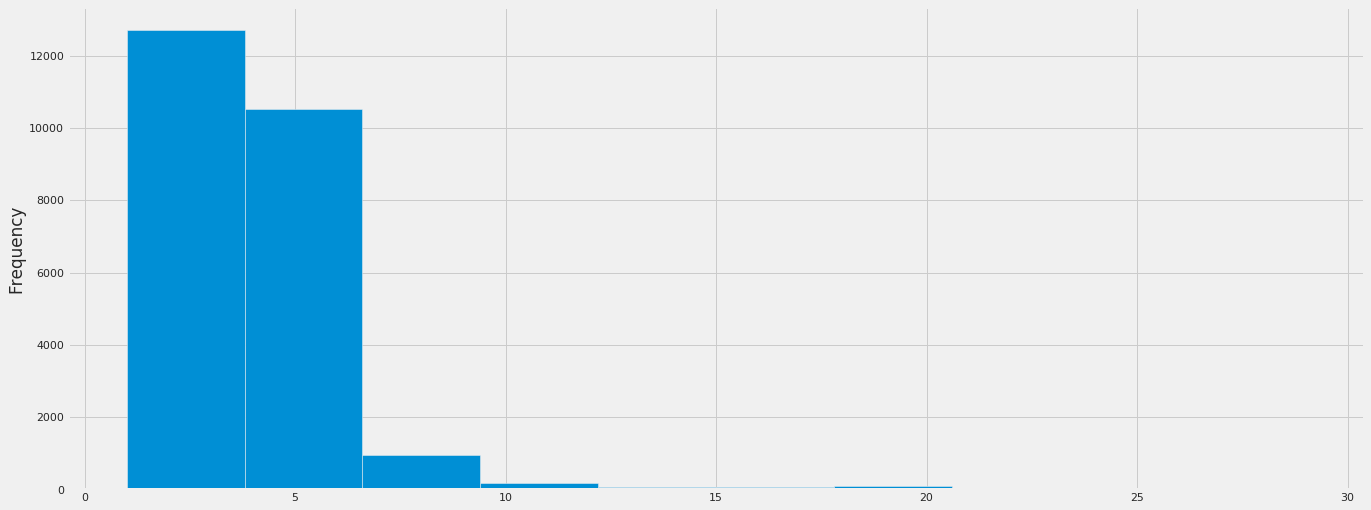

kamar


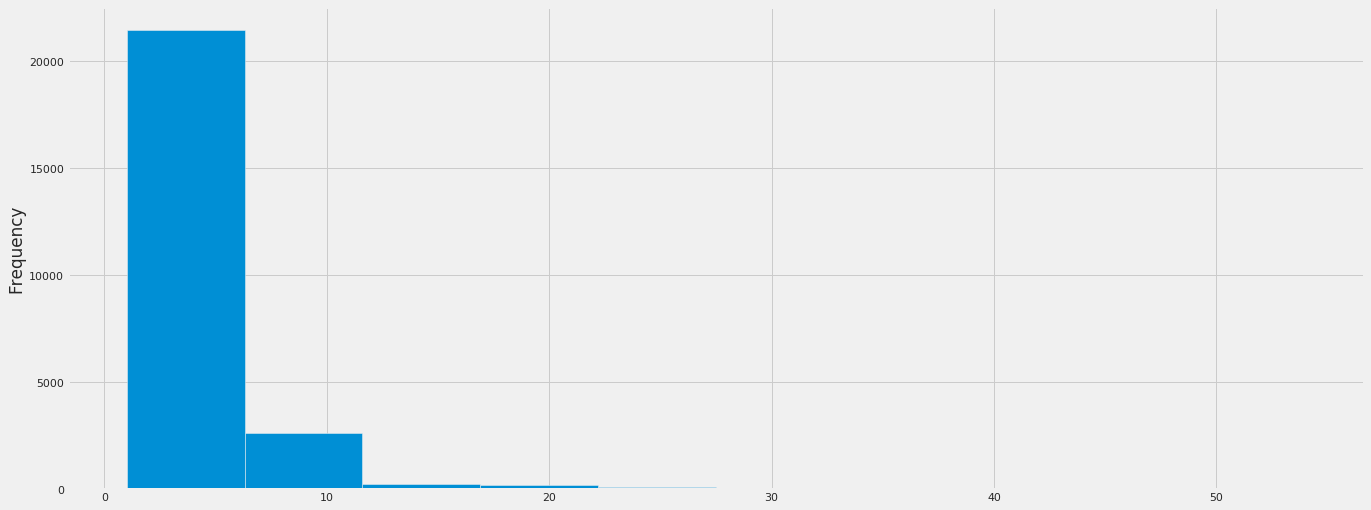

lb


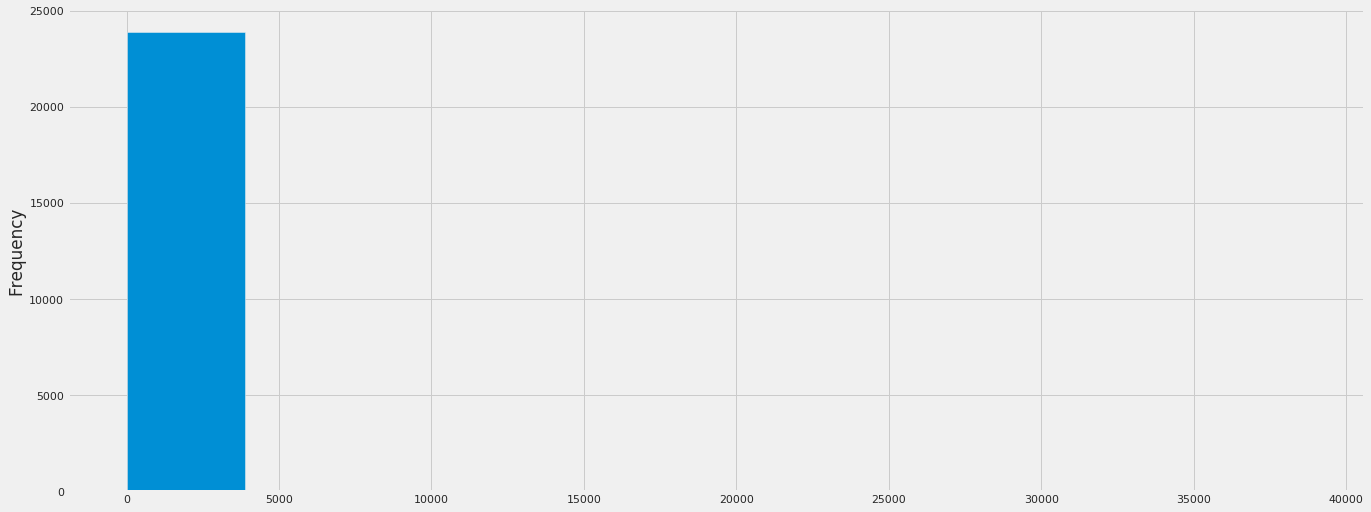

lt


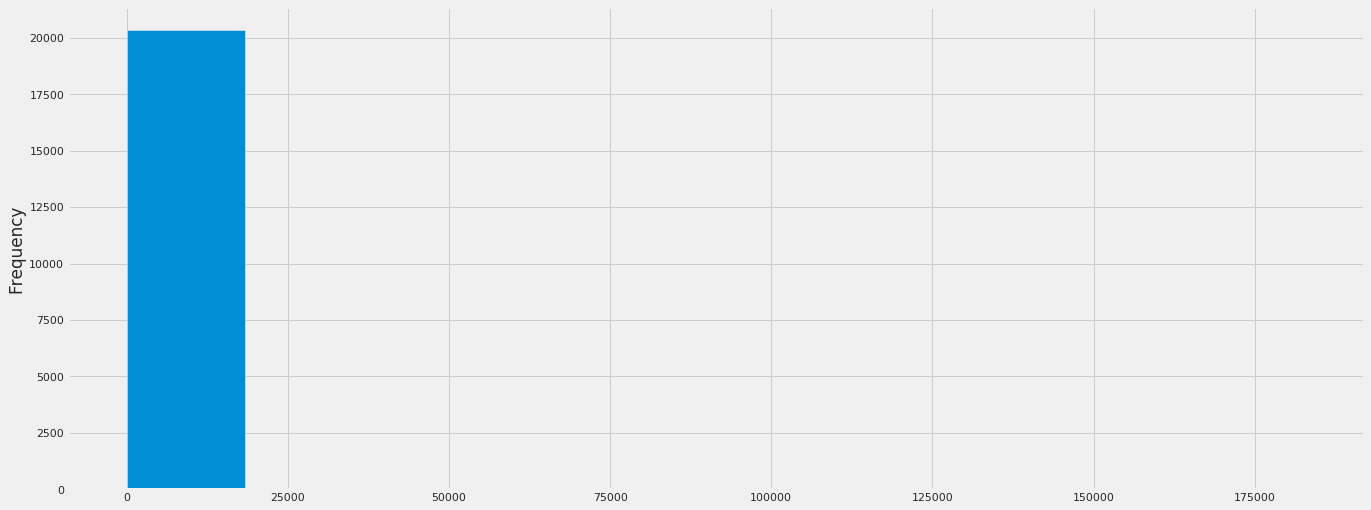

price


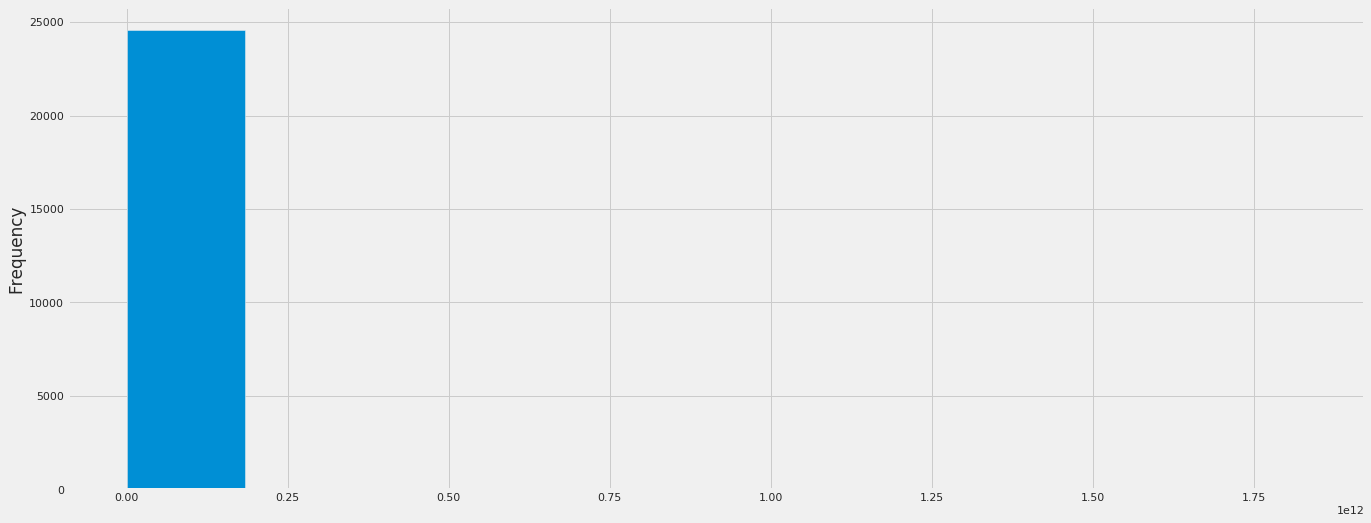

electricity


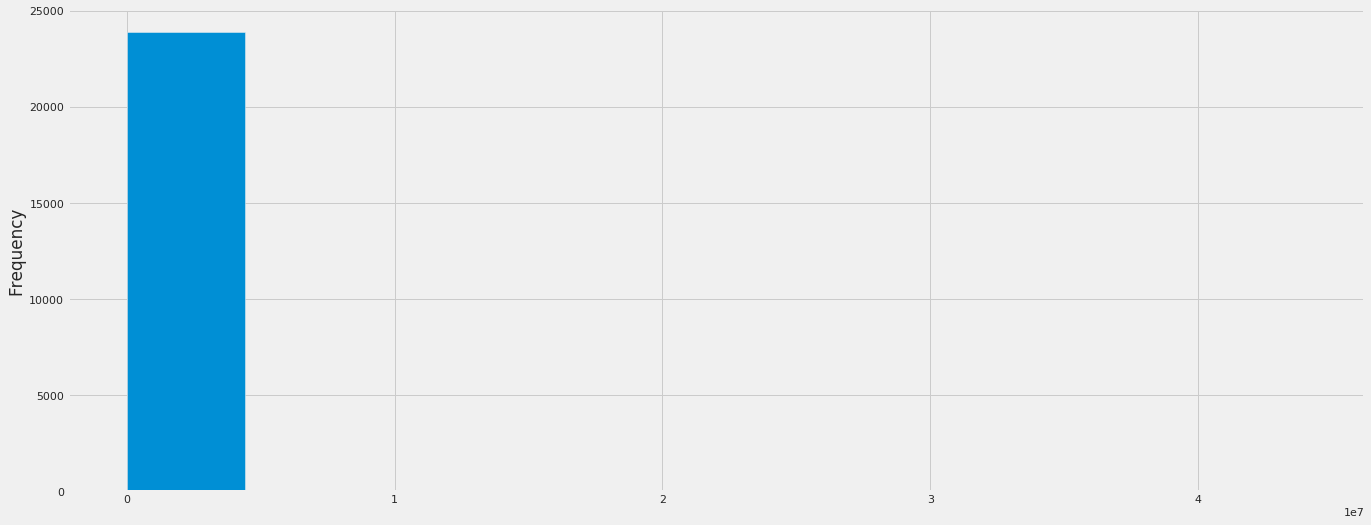

floors_total


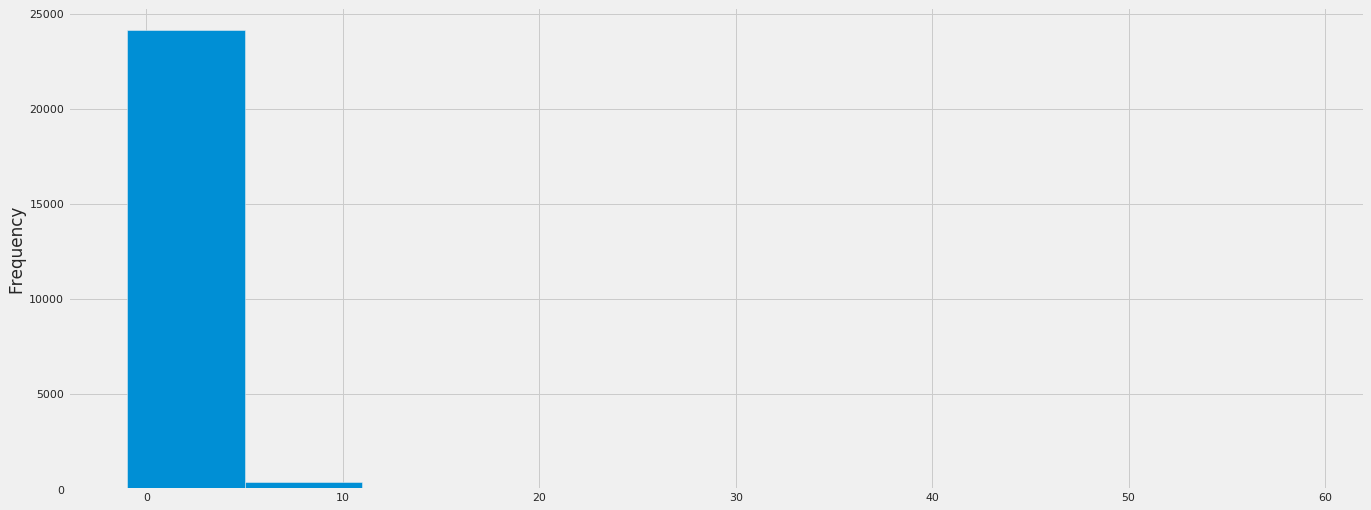

In [20]:
for i in num:
    print(i)
    df[i].plot.hist()
    plt.show()

tipe_property


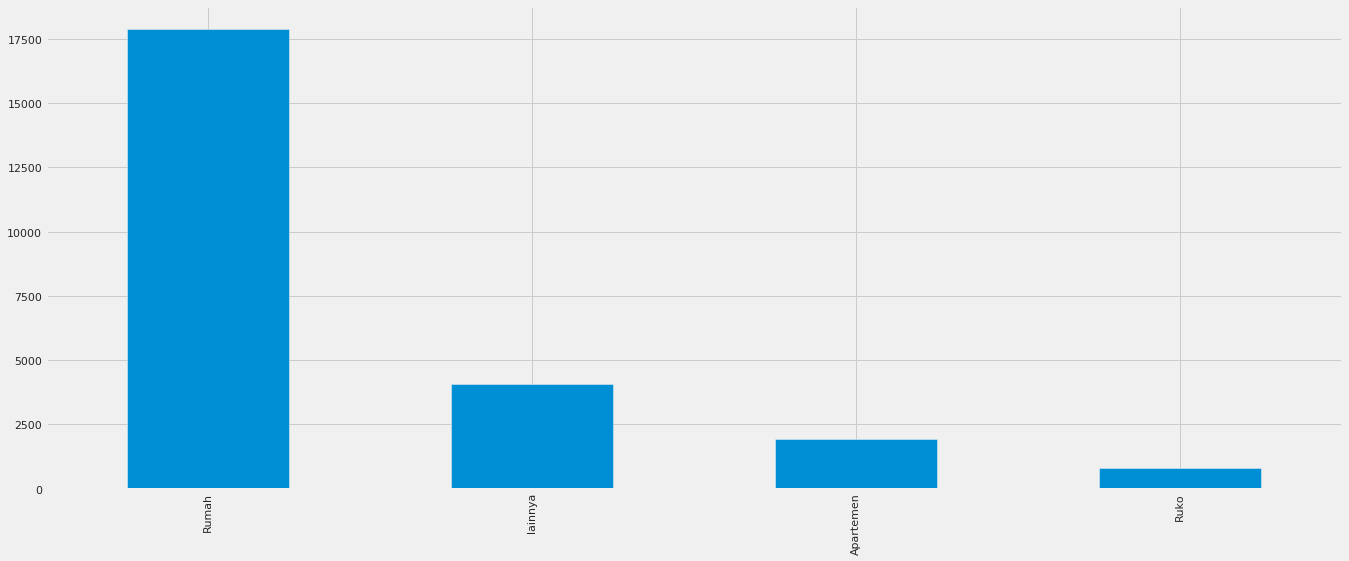

sertifikat


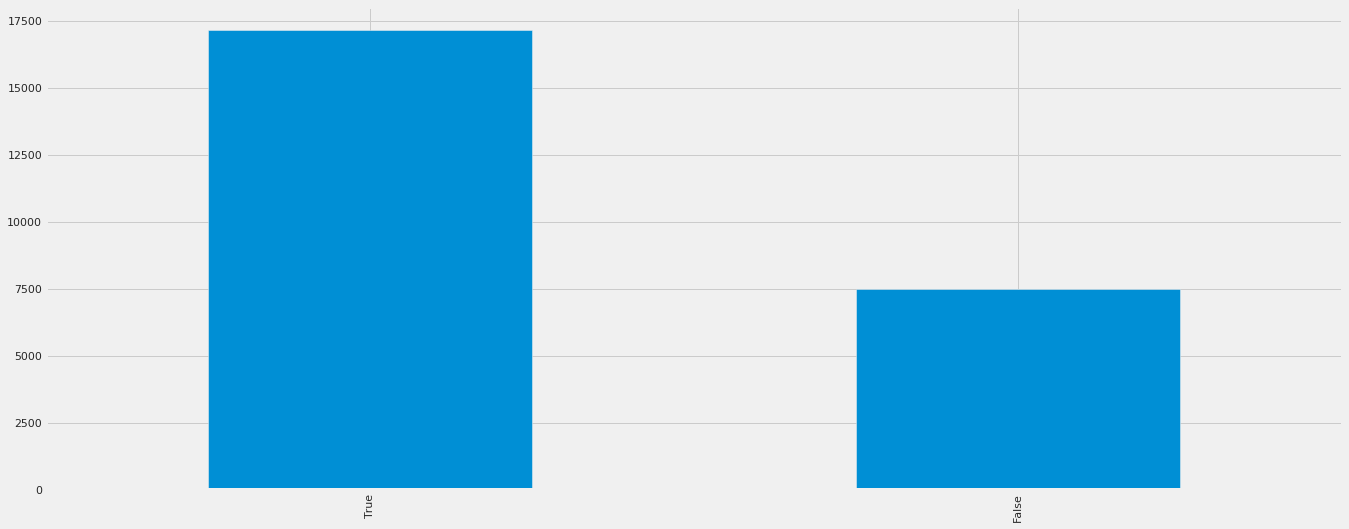

lokasi


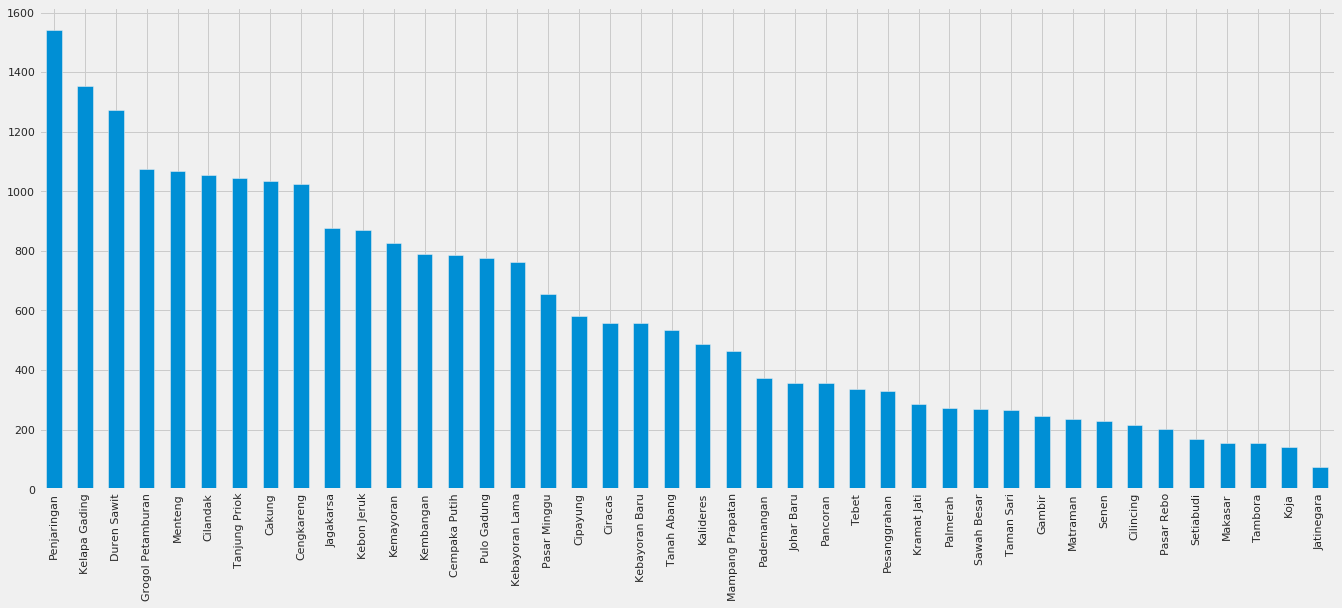

ada_garasi


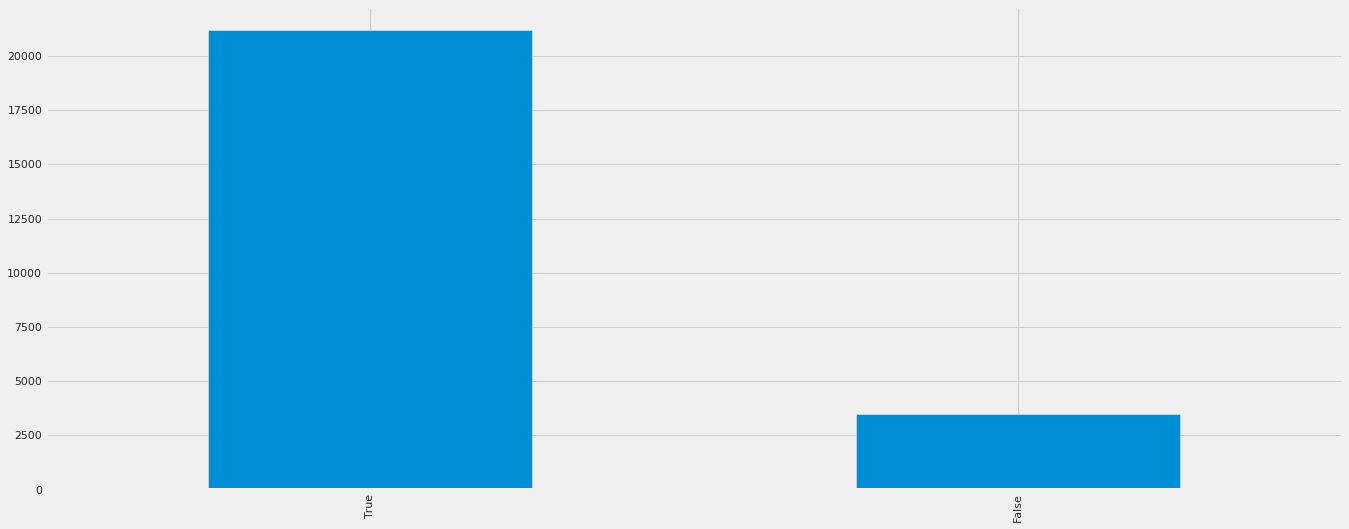

pool


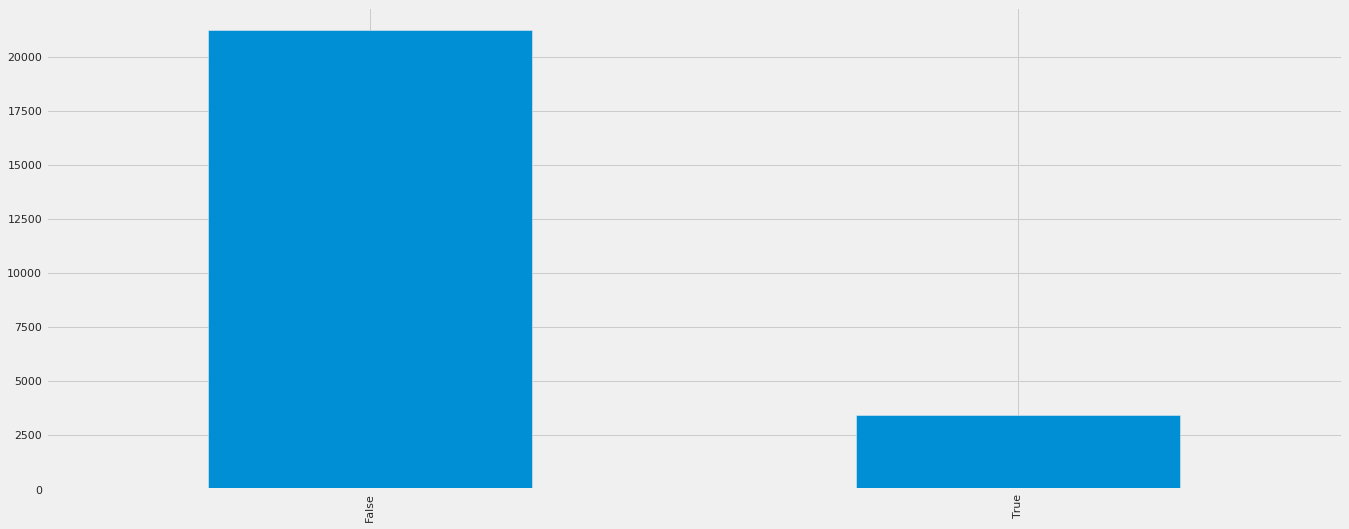

taman


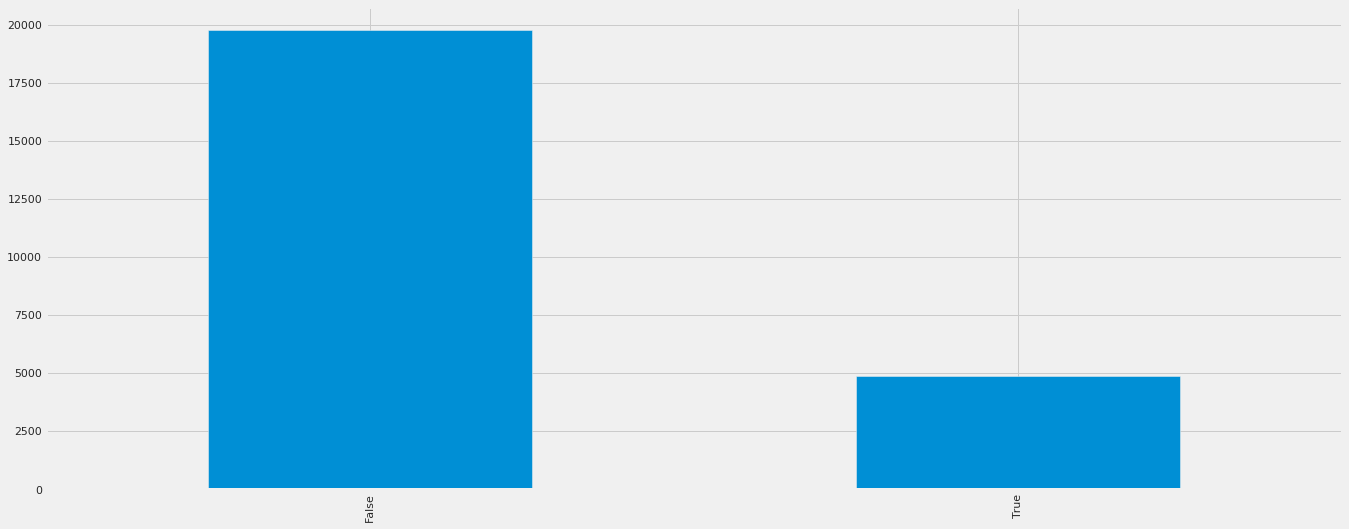

gym


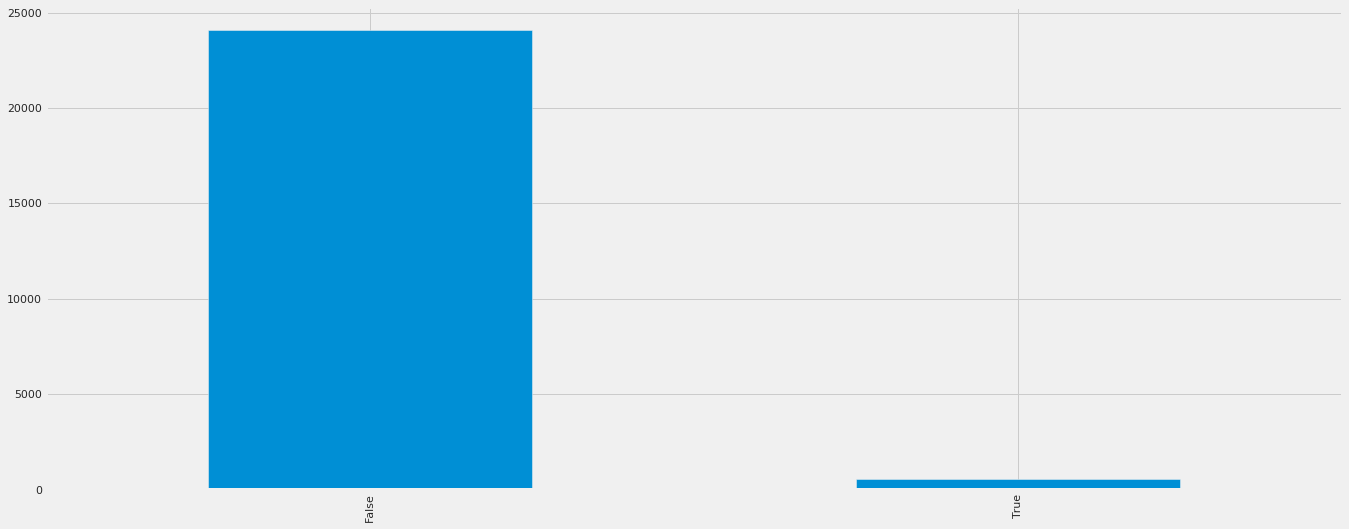

In [21]:
for i in cat:
    if df[i].nunique()<100:

        print(i)
        df[i].value_counts().plot.bar()
        plt.show()

In [22]:
df[num].describe()

,kamar_mandi,kamar,lb,lt,price,electricity,floors_total
count,24661.000000,24661.000000,23965.000000,20391.000000,2.466100e+04,2.388600e+04,24661.000000
mean,3.805645,4.783018,300.113624,360.786033,8.887048e+09,7.304371e+03,2.098293
std,2.365399,2.952104,758.736985,2561.824543,2.856656e+10,2.848695e+05,1.961095
min,1.000000,1.000000,0.000000,1.000000,5.650000e+05,-1.000000e+00,-1.000000
25%,3.000000,3.000000,100.000000,90.000000,1.600000e+09,2.000000e+03,2.000000
50%,3.000000,4.000000,180.000000,150.000000,3.000000e+09,2.200000e+03,2.000000
75%,5.000000,5.000000,320.000000,283.000000,6.800000e+09,4.400000e+03,2.000000
max,29.000000,54.000000,38668.000000,182860.000000,1.830000e+12,4.400350e+07,59.000000


Check median price distribution

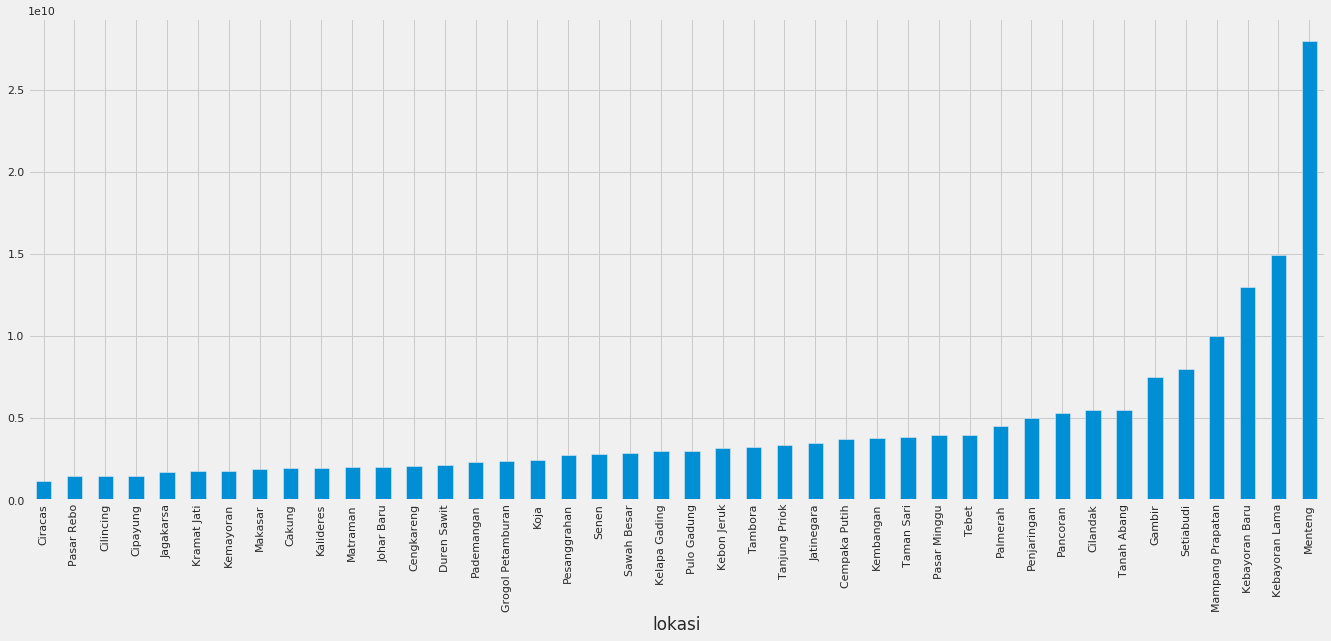

In [23]:
df.groupby('lokasi')['price'].median().sort_values().plot.bar()
plt.show()

In [24]:
df[['lokasi','price']]

,lokasi,price
0,Kebayoran Lama,1.000000e+11
1,Pasar Minggu,3.250000e+10
2,Pancoran,4.718000e+10
3,Pasar Minggu,2.115000e+10
4,Mampang Prapatan,4.900000e+09
...,...,...
24656,Koja,8.800000e+09
24657,Koja,2.950000e+09
24658,Koja,1.750000e+09
24659,Koja,7.700000e+09


### Cleaning

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24661 entries, 0 to 24660
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24661 non-null  int64  
 1   kamar_mandi    24661 non-null  int64  
 2   kamar          24661 non-null  int64  
 3   lb             23965 non-null  float64
 4   lt             20391 non-null  float64
 5   tipe_property  24661 non-null  object 
 6   price          24661 non-null  float64
 7   sertifikat     24661 non-null  bool   
 8   deskripsi      24661 non-null  object 
 9   lokasi         24661 non-null  object 
 10  ada_garasi     24661 non-null  bool   
 11  pool           24661 non-null  bool   
 12  taman          24661 non-null  bool   
 13  electricity    23886 non-null  float64
 14  floors_total   24661 non-null  float64
 15  gym            24661 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(3)
memory usage: 2.2+ MB


In [26]:
df[num].describe()

,kamar_mandi,kamar,lb,lt,price,electricity,floors_total
count,24661.000000,24661.000000,23965.000000,20391.000000,2.466100e+04,2.388600e+04,24661.000000
mean,3.805645,4.783018,300.113624,360.786033,8.887048e+09,7.304371e+03,2.098293
std,2.365399,2.952104,758.736985,2561.824543,2.856656e+10,2.848695e+05,1.961095
min,1.000000,1.000000,0.000000,1.000000,5.650000e+05,-1.000000e+00,-1.000000
25%,3.000000,3.000000,100.000000,90.000000,1.600000e+09,2.000000e+03,2.000000
50%,3.000000,4.000000,180.000000,150.000000,3.000000e+09,2.200000e+03,2.000000
75%,5.000000,5.000000,320.000000,283.000000,6.800000e+09,4.400000e+03,2.000000
max,29.000000,54.000000,38668.000000,182860.000000,1.830000e+12,4.400350e+07,59.000000


In [27]:
df.describe(exclude=[np.number])  

,tipe_property,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,gym
count,24661,24661,24661,24661,24661,24661,24661,24661
unique,4,2,24661,42,2,2,2,2
top,Rumah,True,lokasi strategisbebas banjirdekat jalur busway...,Penjaringan,True,False,False,False
freq,17874,17163,1,1542,21199,21220,19763,24090


In [28]:
bsDesc = []

for i in df.columns:
    bsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum() )/ len(df)) * 100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data = bsDesc,
            columns = [
                'Features',
                'DataType',
                'Null',
                'NullPercentage',
                'Unique',
                'Unique Sample'
            ])

,Features,DataType,Null,NullPercentage,Unique,Unique Sample
0,index,int64,0,0.00,24661,"[13492, 14647]"
1,kamar_mandi,int64,0,0.00,29,"[17, 20]"
2,kamar,int64,0,0.00,43,"[43, 11]"
3,lb,float64,696,2.82,934,"[222.0, 1820.0]"
4,lt,float64,4270,17.31,1223,"[1095.0, 412.0]"
5,tipe_property,object,0,0.00,4,"[Rumah, lainnya]"
6,price,float64,0,0.00,1966,"[31702500000.0, 2985000000.0]"
7,sertifikat,bool,0,0.00,2,"[False, True]"
8,deskripsi,object,0,0.00,24661,[rumah springhill kondisi rapi dan terawat.\n ...
9,lokasi,object,0,0.00,42,"[Taman Sari, Cempaka Putih]"


In [29]:
# Pengecekan Outliers
for kolom in num:
    Q1 = df.describe()[kolom]['25%']
    Q3 = df.describe()[kolom]['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)

    OutLiers = df[(df[kolom] < Lower_Fence) | (df[kolom] > Upper_Fence)]
    print(f"Jumlah Outliers kolom {kolom} = {len(OutLiers)}")
    

Jumlah Outliers kolom kamar_mandi = 614
Jumlah Outliers kolom kamar = 1218
Jumlah Outliers kolom lb = 1834
Jumlah Outliers kolom lt = 2020
Jumlah Outliers kolom price = 3076
Jumlah Outliers kolom electricity = 3120
Jumlah Outliers kolom floors_total = 11103


#### Cleaning Kolom `lb`
- Drop NaN value (NaN values kebanyakan memiliki tipe properti 'lainnya' - jual tanah)
- Batas nilai `lb` dibatasi $20<lb<10000$

In [30]:
df[df['lb'].isna()==True]['tipe_property'].value_counts()

lainnya      396
Rumah        254
Ruko          28
Apartemen     18
Name: tipe_property, dtype: int64

In [31]:
df.dropna(subset=['lb'], inplace=True)

In [32]:
df = df[(df['lb']<10000) & (df['lb']>20)]

In [33]:
# Handling Outliers Kolom lb
Q1 = df.describe()['lb']['25%']
Q3 = df.describe()['lb']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

Out = df[(df['lb'] < Lower_Fence) | (df['lb'] > Upper_Fence)]
print('Jumlah data outliers pada kolom lb = ', len(Out['lb']))
print('Jumlah data keseluruhan =', len(df))
# df[(df['lb'] > Upper_Fence)]

Jumlah data outliers pada kolom lb =  1815
Jumlah data keseluruhan = 23816


#### Cleaning kolom `lt` 

In [34]:
df.loc[df['tipe_property'] == "Apartemen", "lt"] = 0

In [35]:
df[df['lt'].isna()==True]['tipe_property'].value_counts()

lainnya    1215
Ruko        728
Rumah       385
Name: tipe_property, dtype: int64

In [36]:
df.dropna(subset=['lt'], inplace=True)

In [37]:
df[~(df['tipe_property']=='Apartemen')].describe()['lt']

count    19589.000000
mean       244.523202
std        379.667884
min          1.000000
25%         90.000000
50%        145.000000
75%        270.000000
max      29375.000000
Name: lt, dtype: float64

In [38]:
df[~(df['tipe_property']=='Apartemen')]['lt'].sort_values()[:120]

24452     1.0
12335     1.0
9062      1.0
17261     1.0
252       1.0
         ... 
13673    21.0
14352    21.0
23233    21.0
23257    21.0
23207    21.0
Name: lt, Length: 120, dtype: float64

In [39]:
df[~(df['tipe_property']=='Apartemen')]['lt'].sort_values(ascending=False)[:10]

17184    29375.0
21501    11000.0
1822      7000.0
14547     6575.0
24335     6427.0
17294     6201.0
23571     6075.0
22888     6000.0
13823     5356.0
2352      5250.0
Name: lt, dtype: float64

In [40]:
df.sample(2)

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym
21237,22694,1,1,31.0,0.0,Apartemen,9.500000e+08,False,Apartemen Eklusive di Kawasan Eklusive Kelapa ...,Kelapa Gading,True,False,False,0.0,1.0,False
20166,21486,1,2,76.0,0.0,Apartemen,1.400000e+09,True,TERMURAH APARTEMEN THE MANSION JASMINE KEMAYOR...,Pademangan,True,True,True,0.0,1.0,False


In [41]:
df.drop(df[(df['lt']<22) & (df['tipe_property'] != 'Apartemen')].index, inplace=True)

In [42]:
df.drop(df[df['lt'] > 10000].index, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21319 entries, 0 to 24660
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21319 non-null  int64  
 1   kamar_mandi    21319 non-null  int64  
 2   kamar          21319 non-null  int64  
 3   lb             21319 non-null  float64
 4   lt             21319 non-null  float64
 5   tipe_property  21319 non-null  object 
 6   price          21319 non-null  float64
 7   sertifikat     21319 non-null  bool   
 8   deskripsi      21319 non-null  object 
 9   lokasi         21319 non-null  object 
 10  ada_garasi     21319 non-null  bool   
 11  pool           21319 non-null  bool   
 12  taman          21319 non-null  bool   
 13  electricity    20672 non-null  float64
 14  floors_total   21319 non-null  float64
 15  gym            21319 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(3)
memory usage: 2.1+ MB


#### Cleaning kolom `tipe_property`

In [44]:
df['tipe_property'].value_counts()

Rumah        17021
lainnya       2355
Apartemen     1899
Ruko            44
Name: tipe_property, dtype: int64

In [45]:
df = df[df['tipe_property'] != 'Ruko']
df['tipe_property'].value_counts()

Rumah        17021
lainnya       2355
Apartemen     1899
Name: tipe_property, dtype: int64

In [46]:
x = df[df['tipe_property'] == 'lainnya'].head(10)
x['deskripsi'].iloc[4]

'[ for sale ]hunian nyaman & asrijagakarsa - jakarta selatan\ncluster idaman design classic ready stock 1 unit lagilt 116 m2lb 180 m2kt 4 + 1km 3 + 1carport 1 mobillistrik 2200 watt\nopen : 1.8 m - nego\ndekat pusat perbelanjaandekat pusat transportasidekat pusat pendidikandekat pasar tradisional\nlegalitas : shm - imb & pbb clear\ncash / kpr * di bantu sampai tuntas *\ninfo hub : akmalcall or wa\nkami juga menyediakan hunian :clusternon clusterindent - custom\nkami akan melayani anda dengan senang hati , karena kepuasan anda keutamaan bagi kami_vine property'

__untuk sementara pertahankan data dengan tipe properti $=$ lainnya__

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21275 entries, 0 to 24660
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21275 non-null  int64  
 1   kamar_mandi    21275 non-null  int64  
 2   kamar          21275 non-null  int64  
 3   lb             21275 non-null  float64
 4   lt             21275 non-null  float64
 5   tipe_property  21275 non-null  object 
 6   price          21275 non-null  float64
 7   sertifikat     21275 non-null  bool   
 8   deskripsi      21275 non-null  object 
 9   lokasi         21275 non-null  object 
 10  ada_garasi     21275 non-null  bool   
 11  pool           21275 non-null  bool   
 12  taman          21275 non-null  bool   
 13  electricity    20630 non-null  float64
 14  floors_total   21275 non-null  float64
 15  gym            21275 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(3)
memory usage: 2.0+ MB


#### Cleaning kolom `price`
- drop data dengan harga dibawah 50 jt
- pertahankan data dengan harga rumah di atas upper fence

In [48]:
df['price'].describe()

count    2.127500e+04
mean     7.195779e+09
std      1.452871e+10
min      5.650000e+05
25%      1.550000e+09
50%      2.990000e+09
75%      6.500000e+09
max      3.750000e+11
Name: price, dtype: float64

In [49]:
df.sort_values(by=['price'], ascending=True).head(30)['price']/1_000_000

24123      0.565
17519      3.000
17186      4.500
22075     10.000
22377     12.000
15468     16.000
22535     16.000
21884     16.000
22815     24.000
18763     33.000
23480     35.000
19095     35.500
18930     40.000
18929     40.000
16322     40.000
14224     45.000
21368     52.500
19093     55.000
16035     55.000
15103     63.000
19348     65.000
14951     85.000
13676     85.000
20821     88.000
20824     95.000
17670     95.000
14759     99.000
13562    100.000
14820    100.000
14557    100.000
Name: price, dtype: float64

In [50]:
## Drop rumah dengan harga pencilan?
# Handling Outliers Kolom price
Q1 = df.describe()['price']['25%']
Q3 = df.describe()['price']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

Out = df[(df['price'] < Lower_Fence) | (df['price'] > Upper_Fence)]
print('Jumlah data outliers pada kolom lb = ', len(Out['lb']))
print('Jumlah data keseluruhan =', len(df))
# df[(df['price'] > Upper_Fence)]
# df[(df['price'] > Lower_Fence)]

Jumlah data outliers pada kolom lb =  2510
Jumlah data keseluruhan = 21275


In [51]:
df[(df['price'] < Lower_Fence)]

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym


In [52]:
df[(df['price'] > Upper_Fence)].sort_values(by=['price'], ascending=False).head()

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym
317,324,7,8,2700.0,4260.0,Rumah,3.750000e+11,True,rumah super mewah view golf luxurious european...,Kebayoran Lama,True,True,False,NaN,2.0,False
21544,23034,7,6,4260.0,2700.0,Rumah,3.750000e+11,True,RUMAH MEWAH DI BUKIT GOLF PONDOK INDAH HARGA M...,Kebayoran Lama,True,True,True,76000.0,3.0,False
21631,23121,7,6,2700.0,4260.0,Rumah,3.750000e+11,True,RUMAH BUKIT GOLF PONDOK INDAH ~ LT/LB 4.260/2....,Kebayoran Lama,True,True,True,76000.0,2.0,False
22888,24416,5,7,700.0,6000.0,Rumah,3.500000e+11,True,rumah hitung tanah saja patra Kuningan Jakarta...,Setiabudi,True,False,False,0.0,2.0,False
21517,23007,4,4,1300.0,1580.0,Rumah,3.000000e+11,True,BUKIT GOLF RUMAH MEWAH:Bukit Golf pondok Indah...,Kebayoran Lama,True,True,False,0.0,2.0,False


In [53]:
df = df[(df['price'] > 50_000_000)]

In [54]:
df['price'].describe()

count    2.125900e+04
mean     7.201177e+09
std      1.453284e+10
min      5.250000e+07
25%      1.550000e+09
50%      2.998000e+09
75%      6.500000e+09
max      3.750000e+11
Name: price, dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21259 entries, 0 to 24660
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          21259 non-null  int64  
 1   kamar_mandi    21259 non-null  int64  
 2   kamar          21259 non-null  int64  
 3   lb             21259 non-null  float64
 4   lt             21259 non-null  float64
 5   tipe_property  21259 non-null  object 
 6   price          21259 non-null  float64
 7   sertifikat     21259 non-null  bool   
 8   deskripsi      21259 non-null  object 
 9   lokasi         21259 non-null  object 
 10  ada_garasi     21259 non-null  bool   
 11  pool           21259 non-null  bool   
 12  taman          21259 non-null  bool   
 13  electricity    20614 non-null  float64
 14  floors_total   21259 non-null  float64
 15  gym            21259 non-null  bool   
dtypes: bool(5), float64(5), int64(3), object(3)
memory usage: 2.0+ MB


#### Cleaning kolom sertifikat
- No missing value
- Nothing dropped

In [56]:
df['sertifikat'].value_counts()

True     15602
False     5657
Name: sertifikat, dtype: int64

In [57]:
pd.crosstab(index=df['tipe_property'], columns=df['sertifikat'], margins=True )

sertifikat,False,True,All
tipe_property,,,
Apartemen,812,1082,1894
Rumah,3617,13393,17010
lainnya,1228,1127,2355
All,5657,15602,21259


#### Cleaning kolom `lokasi`

In [58]:
df['lokasi'].nunique()

42

#### Cleaning kolom `ada_garasi`, `pool`, `taman`, `gym`
- No missing value

#### Cleaning kolom `floors_total`
- drop data with values $0$ and $-1$
- normalisasi `floors_total` untuk data dengan tipe properti apartemen $= 1$
- Nilai kolom dengan jlh lantai $\geq 5$ masih banyak yang tidak sesuai deskripsi $\rightarrow$ dibaca lagi dari deskripsi?

In [59]:
df[df['tipe_property'] == 'Apartemen']['floors_total'].value_counts()

1.0     1253
2.0      359
3.0      173
4.0       64
5.0       22
11.0       4
8.0        3
9.0        2
21.0       2
48.0       2
7.0        1
0.0        1
39.0       1
59.0       1
35.0       1
30.0       1
36.0       1
6.0        1
16.0       1
29.0       1
Name: floors_total, dtype: int64

In [60]:
# df[(df['tipe_property'] == 'Apartemen') & (df['floors_total']==3)].iloc[0]['deskripsi']
df.loc[df['tipe_property'] == "Apartemen", "floors_total"] = 1
df[df['tipe_property'] == 'Apartemen']['floors_total'].value_counts()

1.0    1894
Name: floors_total, dtype: int64

In [61]:
df['floors_total'].describe()

count    21259.000000
mean         1.893504
std          1.435457
min         -1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         48.000000
Name: floors_total, dtype: float64

In [62]:
df['floors_total'].value_counts()

 2.0     11752
 1.0      4824
 3.0      2878
-1.0       990
 4.0       600
 5.0       118
 8.0        17
 6.0        12
 7.0        11
 9.0        10
 11.0        8
 0.0         8
 21.0        6
 30.0        6
 39.0        2
 16.0        2
 25.0        2
 12.0        1
 48.0        1
 46.0        1
 15.0        1
 22.0        1
 19.0        1
 28.0        1
 10.0        1
 40.0        1
 23.0        1
 38.0        1
 26.0        1
 36.0        1
Name: floors_total, dtype: int64

In [63]:
df = df[df['floors_total'] > 0]
df['floors_total'].describe()

count    20261.000000
mean         2.035635
std          1.315791
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         48.000000
Name: floors_total, dtype: float64

##### _Periksa data dengan nilai `floors_total` tinggi_

In [64]:
L  = df[df['floors_total']>5]
L['floors_total'].value_counts()

8.0     17
6.0     12
7.0     11
9.0     10
11.0     8
30.0     6
21.0     6
39.0     2
25.0     2
16.0     2
15.0     1
12.0     1
19.0     1
23.0     1
38.0     1
28.0     1
40.0     1
10.0     1
26.0     1
36.0     1
48.0     1
22.0     1
46.0     1
Name: floors_total, dtype: int64

In [65]:
L['tipe_property'].value_counts()

Rumah      74
lainnya    15
Name: tipe_property, dtype: int64

In [66]:
L[L['floors_total'] == 48].iloc[0]['deskripsi']

'kondisi bagus, 2 lantai, luas tanah 26m2, sertifikat shm - sertifikat hak milik, hadap selatan, 2kt, 2km, listrik 2200 watt. mohon sebutkan ga14020-br saat menghubungi kami.\nstatus : dijual\nharga dan ketersediaan properti ini bisa berubah sewaktu-waktu tanpa pemberitahuan terlebih dahulu. harap hubungi kami untuk mendapat harga dan informasi ketersediaan terkini.\nhubungi segera'

In [67]:
L[L['floors_total'] == 46].iloc[0]['deskripsi']

'jual\xa0rumah mewah baru\xa0model semi klasik\xa0kawasan elite siap huni cempaka putih jakarta pusat  harga 6.9 m nego  spesifikasi :  1. lt/lb : 225/ 370 2. kamar tidur / kamar mandi : 4+1/ 4+1 3. carport : 2 garasi 1 5. listrik\xa0: 3500 watt 7. air\xa0: jetpump 8. shm + imb 9. model semi klasik  selling point :  1. dekat rs. islam jakarta 2. dekat sekolah smp , sma negeri dan swasta 3. dekat universitas yarsi 4. dekat ke jalan utama / jalan protokol\xa0 5. posisi hoek  meeting point kfc cempaka putih  (olv)'

In [68]:
L[L['floors_total'] == 21].iloc[3]['deskripsi']

'cempaka putih tengah kompleks mewah\n(cocok untuk mess pemda karena sudah ada beberapa)\n\nlt/lb 382/282, 2 lantai, shm.\n\nkt 5+2\n\nkm 3+1\n\nlebar 15m panjang 26m\n\ngarasi 2+2 mobil\n\nac 7 units\n\nkondisi standard atap full baja ringan\n\nlebar jalan 7m (2.5 mobil), jalanan portal tidak lalu lalang mobil.\n\nrumah masih ditempati\n\n2km to lotte mall\n2km to transmart carrefour\n1km to kawasan bisnis'

In [69]:
L[L['floors_total'] == 8].iloc[2]['deskripsi']

'dijual rumah 2 lantai villa fatmawati town house, \xa0sangat strategis, dekat mall, sekolah, rs, bank, perkantoran, sangat strategis, nyaman, tenang, siap huni, cocok untuk tempat hunian yang sehat, hadap timur. mudah mencari angkutan umum. dekat dengan stasiun mrt fatmawati.  spesifikasi : 2 lantai luas tanah : 320 m2 luas bangunan : 275 m2 kamar tidur : 3 kamar mandi : 4 kmr tdr pembantu : 1 kmr mandi pembantu : 1 gudang : 1  fasilitas : *swimming pool *garasi : 2 mobil *carport : 2 mobil *ada halaman depan \xa0 *listrik 10.600 watt *jet-pump  sertifikat : hak milik  harga jual rp 7,7 m (nego)   lokasi :  fatmawati town house jl rs fatmawati no 15 pondok labu - cilandak jakarta selatan 12450   yang berminat, hubungi : "bless property" ibu dhany ,'

In [70]:
x = df[df['floors_total'] == 5]
for i in range(10):
    print(x.iloc[i]['deskripsi'])
    print(100*'=')

for sales luxury house pondok indah jakarta selatan.  264m/603m 4 + 3 bedrooms 6 + 1 bathrooms lift for 5 floors basement entertainment center wide swimming pool rooftop area imported marble flooring premium finish and sanitair designed by ateiler riri top architect indonesia price 18.5m nego
for sale brand new classic house prestigious location-pondok indah south jakarta the environment is highly desired  with a very large front road property specifications : land : 348 m2 build:1200 m2 5 storey  bedroom 5+2 bathroom 5+2 car park 10 lift  swiming pool fish pond maid pavilion banker mini golf upper dark  full marble import  sauna room water heater electricity 34.000 price idr 33,000,000,000
for sale. minimalist home /cozy living *beautiful interiors* semi furnished townhouse at lebak bulus cilandak - jakarta selatan - very close to mayapada hospital - carrefour lebak bulus - tol jorr fatmawati - mrt station lebak bulus - trans jakarta station - calm & convinient environment - free from

In [71]:
x = df[df['floors_total'] == 3]
for i in range(10):
    print(x.iloc[i]['deskripsi'])
    print(100*'=')

harga perdana !! siapa cepat dia dapat!! unit terbatas!! hunian terbaru, termurah dalam cluster, lokasi strategis di jakarta selatan, hanya selangkah ke pondok indah, pintu tol jorr dan senayan di design exclusive dengan konsep modern elegant dengan kualitas material terbaik, sirkulasi udara dan pencahayaan dalam rumah sangat bagus. unit terbatas !! bebas banjir, terletak di jakarta selatan, lokasi sangat strategis, lingkungan aman, nyaman dan tenang. akses yang sangat mudah seperti : - 10 menit ke senayan - 10 menit ke sudirman, scbd - 10 menit ke mal pondok indah - 10 menit ke tol jorr spesifikasi: - luas tanah : 111 m2 - luas bangunan : 182 m2 - bangunan : 3 lantai - kamar tidur : 3 + 1 - kamar mandi : 3 + 1 - ruang tamu, ruang keluarga, dapur, taman depan dan belakang - carport 2 mobil - one gate system - keamanan/security 24 jam harga sudah termasuk shm, imb, listrik 3300 watt, pompa air jet pump, 1 line telepon cara bayar sangat fleksibel : *bisa cash keras, cash bertahap dan kpr

In [72]:
import re
## Fungsi membaca jumlah lantai 
def JLantai(text):
    angka1='o'
    cari1 = re.search('lantai',text)
    try:
        S1 = cari1.span()
        hasil1 = text[S1[1]-12:S1[1]]
        H = re.findall(r"[^\n]+",hasil1)
        for i in H:
            if 'lantai' in i:
                hasil1 = i
                break
        x = re.search(r'\d\.\d|\d\,\d',hasil1)
        if x != None:
            angka1 = x.group()
        else:
            H = re.findall(r"[^.,]+",hasil1)
            for i in H:
                if 'lantai' in i:
                    hasil1 = i
                    break
            try:
                angka1 = (re.search(r'\d',hasil1)).group()
            except:
                S1 = cari1.span()
                hasil1 = text[S1[1]-6:S1[1]+7]
                H = re.findall(r"[^.,\n]+",hasil1)
                for i in H:
                    if 'lantai' in i:
                        hasil1 = i
                        break
                try:
                    cari = re.search("lantai",hasil1)
                    S = cari.span()
                    if ':' in hasil1[S[1]:S[1]+3]:
                        angka1 = (re.search(r'\d',hasil1)).group()
                except:
                    angka1 = 'ga ada angka?' 
    except:
        hasil1 = 'ga nemu'
    if angka1[0].isdigit() == False:    
        angka2='o'
        cari2 = re.search("tingkat",text)
        try:
            S2 = cari2.span()
            hasil2 = text[S2[1]-13:S2[1]]
            H = re.findall(r"[^\n]+",hasil2)
            for i in H:
                if 'tingkat' in i:
                    hasil2 = i
                    break
            x = re.search(r'\d\.\d|\d\,\d',hasil2)
            if x != None:
                angka2 = x.group()
            else:
                H = re.findall(r"[^.,]+",hasil2)
                for i in H:
                    if 'tingkat' in i:
                        hasil2 = i
                        break
                try:
                    angka2 = (re.search(r'\d',hasil2)).group()
                except:
                    S2 = cari2.span()
                    hasil2 = text[S2[1]-7:S2[1]+7]
                    H = re.findall(r"[^.,\n]+",hasil2)
                    for i in H:
                        if 'tingkat' in i:
                            hasil2 = i
                            break
                    try:
                        cari = re.search("tingkat",hasil2)
                        S = cari.span()
                        if ':' in hasil2[S[1]:S[1]+3]:
                            angka2 = (re.search(r'\d',hasil2)).group()
                    except:
                        angka2 = 'ga ada angka?' 
        except:
            hasil2 = 'ga nemu'
        if angka2[0].isdigit() == False:   
            angka3='o'
            cari3 = re.search("floors",text)
            try:
                S3 = cari3.span()
                hasil3 = text[S3[1]-12:S3[1]]
                H = re.findall(r"[^\n]+",hasil3)
                for i in H:
                    if 'floors' in i:
                        hasil3 = i
                        break
                x = re.search(r'\d\.\d|\d\,\d',hasil3)
                if x != None:
                    angka3 = x.group()
                else:
                    H = re.findall(r"[^.,]+",hasil3)
                    for i in H:
                        if 'floors' in i:
                            hasil3 = i
                            break
                    try:
                        angka3 = (re.search(r'\d',hasil3)).group()
                    except:
                        S3 = cari3.span()
                        hasil3 = text[S3[1]-6:S3[1]+7]
                        H = re.findall(r"[^.,\n]+",hasil3)
                        for i in H:
                            if 'floors' in i:
                                hasil3 = i
                                break
                        try:
                            cari = re.search("floors",hasil3)
                            S = cari.span()
                            if ':' in hasil3[S[1]:S[1]+3]:
                                angka3 = (re.search(r'\d',hasil3)).group()
                        except:
                            angka3 = 'ga ada angka?' 
            except:
                hasil3 = 'ga nemu'
            if angka3[0].isdigit() == False: 
                return np.nan
            else:
                return angka3
        else:
            return angka2
    else:
        return angka1

###########

## Fungsi Convert JLantai
def konv(text):
    try:
        x = text.replace(',','.')
        return float(x)
    except:
        return text
# konv(np.nan)
# konv('1,5')

### Testing Fungsi
text = df[df['floors_total'] == 3].iloc[2]['deskripsi']
print(konv(JLantai(text)))
print(text)

3.0
exclusive townhouse at cilandak    7 unit hunian modern american classic berkonsep bangunan split level /mezzanine    open 2.57 m negotiable  bangunan 3 lantai semi basement untuk 2 mobil   luas tanah 108 m2  luas bangunan 166 m2 kamar tidur 3 +1  kamar mandi 4   legalitas : shm imb pbb     selling poin  - dekat pusat perbelanjaan trans mart cilandak  - 2 menit ke toll tb simatupang  - dekat rumah sakit   - dekat selter bus way  - dekat tempat rekreasi  - 3 menit ke ampera   - akses 2 mobil  - angkutan umum 24 jam  - bebas banjir    *ket.   kav a lt/lb 140/166 harga 3.47 m  cash 2.95 m  kav b lt/lb 191/171 harga 5 m  cash 4.1 m  kav c lt/lb 110/166 harga 2.99 m cash 2.69 m  kav d lt/lb 119/171 harga 3.4 m cash 2.99 m  kav e lt/lb 111/166 harga 3.2 m cash 2.83 m  kav f lt/lb 108/166 harga 2.86 m cash 2.57 m  kav g lt/lb 136/171 harga 3.74 m cash 2.99 m


#### Membuat kolom `floors_total_new`
- Kolom ini memiliki nilai yang sama dengan `floors_total` untuk data dengan jumlah lantai $<3$
- Data dengan jumlah lantai $\geq 3$ akan dicari lewat deskripsi. 
- Bila nilai jumlah lantai tidak ditemukan di deskripsi, nilai jumlah lantai data ini akan diisi dengan nilai `nan` dulu.

In [73]:
df['floors_total'].value_counts()

2.0     11752
1.0      4824
3.0      2878
4.0       600
5.0       118
8.0        17
6.0        12
7.0        11
9.0        10
11.0        8
21.0        6
30.0        6
16.0        2
25.0        2
39.0        2
48.0        1
12.0        1
46.0        1
15.0        1
36.0        1
22.0        1
28.0        1
10.0        1
40.0        1
23.0        1
38.0        1
26.0        1
19.0        1
Name: floors_total, dtype: int64

In [74]:
df['floors_total_new'] = df['floors_total']

In [75]:
df.sample(1)

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym,floors_total_new
16769,17675,4,5,400.0,230.0,Rumah,3.900000e+09,True,Hunian Premium Siap Huni Selangkah Ke TOL Setu...,Cipayung,True,False,False,2200.0,2.0,False,2.0


In [76]:
for i in range(len(df)):
    if df['floors_total_new'].iloc[i]>=3:
        text = df['deskripsi'].iloc[i]
        y = konv(JLantai(text))
        df['floors_total_new'].iloc[i] = y
df['floors_total_new'].value_counts()

/home/rheza/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


2.0    12227
1.0     4964
3.0      785
4.0      145
2.5      124
3.5       89
5.0       37
0.0       31
1.5       29
8.0       16
4.5       14
6.0        8
7.0        8
9.0        5
1.2        3
3.1        3
1.3        3
1.1        2
8.3        1
4.4        1
6.5        1
2.2        1
5.5        1
3.2        1
Name: floors_total_new, dtype: int64

In [77]:
print(df[df['floors_total_new']==7]['deskripsi'].iloc[2])

dijual cepat luxury housejalan bangka raya (di dalam private compound)sangat dekat ke tendean , mampang , kuningan ,kebayoran ,senopati .luas tanah 602mluas bangunan 7462 tingkat + basement5 kamar tidur + 5 kamar mandi 1 kamar powder (kamar kecil untuk tamu)2 kamar pembantu + 1 kamar mandi pembantu 1 ruang kerja (bisa buat mushollah atau ruang doa)1 pantrygarasi muat 6 mobil + 4 motorcarport 6 mobilada kolam renang dan halam belakang taman luas dan besarlistrik 33.000 wattmarmer import , solid wood floor ,grohe-kohler sanitary .harga jual : 22.5 m (nego)informasi dan survey lokasi mohon hubungi :westri0858 80888 225 (wa)0811 8088 225


In [78]:
print(df[df['floors_total_new']==0].iloc[0]['deskripsi'])
df[df['floors_total_new']==0].loc[672]

rumah jual di jln. warung jati luas tanah 153m2 luas bangunan 150m2 2 lantai kamar tidur 5 kamar mandi 2 harga 2,4m


index                                                             689
kamar_mandi                                                         3
kamar                                                               6
lb                                                                150
lt                                                                153
tipe_property                                                   Rumah
price                                                         2.4e+09
sertifikat                                                      False
deskripsi           rumah jual di jln. warung jati luas tanah 153m...
lokasi                                                   Pasar Minggu
ada_garasi                                                       True
pool                                                            False
taman                                                           False
electricity                                                      5500
floors_total        

In [79]:
df.loc[df['floors_total_new'] == 0, 'floors_total_new'] = df['floors_total']

In [80]:
df.loc[672]

index                                                             689
kamar_mandi                                                         3
kamar                                                               6
lb                                                                150
lt                                                                153
tipe_property                                                   Rumah
price                                                         2.4e+09
sertifikat                                                      False
deskripsi           rumah jual di jln. warung jati luas tanah 153m...
lokasi                                                   Pasar Minggu
ada_garasi                                                       True
pool                                                            False
taman                                                           False
electricity                                                      5500
floors_total        

In [81]:
df[df['floors_total_new'].isna()==True]['floors_total'].value_counts()

3.0     1377
4.0      275
5.0       58
8.0       13
6.0        8
7.0        5
9.0        5
30.0       4
21.0       4
11.0       2
12.0       1
19.0       1
23.0       1
38.0       1
25.0       1
10.0       1
16.0       1
39.0       1
22.0       1
40.0       1
46.0       1
Name: floors_total, dtype: int64

In [82]:
df['floors_total_new'] = df['floors_total_new'].fillna(-1)

In [83]:
df.loc[df['floors_total_new'] == -1, "floors_total_new"] = df['floors_total']

In [84]:
df[df['floors_total_new'].isna()==True]['floors_total'].value_counts()

Series([], Name: floors_total, dtype: int64)

In [85]:
df = df[df['floors_total_new'] <= 5]

In [86]:
df['floors_total_new'].value_counts()

2.0    12227
1.0     4964
3.0     2189
4.0      423
2.5      124
5.0       96
3.5       89
1.5       29
4.5       14
1.3        3
3.1        3
1.2        3
1.1        2
3.2        1
2.2        1
4.4        1
Name: floors_total_new, dtype: int64

In [87]:
df['floors_total'].value_counts()

2.0     11752
1.0      4824
3.0      2849
4.0       594
5.0       116
11.0        6
9.0         5
7.0         5
6.0         3
8.0         3
30.0        2
21.0        2
39.0        1
36.0        1
15.0        1
25.0        1
48.0        1
16.0        1
28.0        1
26.0        1
Name: floors_total, dtype: int64

In [88]:
df['floors_total_new'] = df['floors_total_new'].apply(lambda x : int(x))
df['floors_total_new'] = df['floors_total_new'].astype(float)
df['floors_total_new'].value_counts()

2.0    12352
1.0     5001
3.0     2282
4.0      438
5.0       96
Name: floors_total_new, dtype: int64

In [89]:
# df.info()
df[df['floors_total'] != df['floors_total_new']].head()

,index,kamar_mandi,kamar,lb,lt,tipe_property,price,sertifikat,deskripsi,lokasi,ada_garasi,pool,taman,electricity,floors_total,gym,floors_total_new
12,13,5,5,500.0,1038.0,Rumah,1.750000e+10,True,shm 2 lantai ruang kerja ruang musik dapur ber...,Cilandak,True,True,True,NaN,8.0,False,2.0
14,15,4,3,275.0,320.0,Rumah,7.700000e+09,True,dijual rumah 2 lantai villa fatmawati town hou...,Cilandak,True,True,False,NaN,8.0,False,2.0
60,63,5,6,126.0,104.0,Rumah,2.737800e+09,True,satu lagi kami hadirkan the colony residence k...,Cilandak,True,False,False,NaN,3.0,False,2.0
62,65,5,7,185.0,100.0,Rumah,3.500000e+09,True,dijual murah rumah siap huni di tebet utara - ...,Tebet,True,False,False,NaN,3.0,False,2.0
71,74,5,5,140.0,158.0,Rumah,3.950000e+09,True,rumah modern minimalis dalam cluster area bint...,Pesanggrahan,True,False,True,NaN,4.0,False,2.0


In [90]:
df[df['floors_total'] != df['floors_total_new']].iloc[0]['deskripsi']

'shm 2 lantai ruang kerja ruang musik dapur bersih luas dapur kotor sangat luas ruang keluarga sangat besar 2 ruang tamu listrik 10.000 taman luas ada space buat bikin pool rumah hook lokasi tenang dekat ke toll desari'

In [91]:
df['floors_total_new'] = df['floors_total_new'].astype(int)

### Cleaning kolom `kamar` dan `kamar_mandi`

In [92]:
df['tipe_property'].value_counts()

Rumah        15933
lainnya       2342
Apartemen     1894
Name: tipe_property, dtype: int64

In [93]:
df[['kamar','kamar_mandi']].describe()

,kamar,kamar_mandi
count,20169.000000,20169.000000
mean,4.803709,3.828945
std,2.963766,2.364997
min,1.000000,1.000000
25%,3.000000,3.000000
50%,4.000000,3.000000
75%,5.000000,5.000000
max,54.000000,29.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20169 entries, 0 to 24660
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             20169 non-null  int64  
 1   kamar_mandi       20169 non-null  int64  
 2   kamar             20169 non-null  int64  
 3   lb                20169 non-null  float64
 4   lt                20169 non-null  float64
 5   tipe_property     20169 non-null  object 
 6   price             20169 non-null  float64
 7   sertifikat        20169 non-null  bool   
 8   deskripsi         20169 non-null  object 
 9   lokasi            20169 non-null  object 
 10  ada_garasi        20169 non-null  bool   
 11  pool              20169 non-null  bool   
 12  taman             20169 non-null  bool   
 13  electricity       19531 non-null  float64
 14  floors_total      20169 non-null  float64
 15  gym               20169 non-null  bool   
 16  floors_total_new  20169 non-null  int64 

### Cleaning Kolom `electricity`

In [96]:
def listrik(df):    
    df['electricity_desc'] = np.zeros(len(df))
    for i in range(len(df)):
        text = str(df['deskripsi'].iloc[i]).lower().replace('.','').replace(',','')
        try:
            cari = re.search('listrik',text)
            S = cari.span()
            txt = text[S[1]:S[1]+15]
            clean = re.findall(r'[^\D]+',txt)
            clean = [int(i) for i in clean]
            if re.search(r'x',txt):
                clean = clean[0]*clean[1]
            elif (len(clean)>=2) &( (len(str(clean[1]))<=2) | (len(str(clean[0]))<=2)):
                clean = clean[np.argmax(clean)]
            else:
                clean = sum(clean)
        except:
            try:
                cari = re.search('watt',text)
                S = cari.span()
                txt = text[S[1]-10:S[1]]
                clean = re.findall(r'[^\D]+',txt)
                if re.search(r'x',txt):
                    clean = clean[0]*clean[1]
                elif  (len(clean)>=2) &( (len(str(clean[1]))<=2) | (len(str(clean[0]))<=2)):
                    clean = clean[np.argmax(clean)]
                else:
                    clean = sum(clean)
            except:
                try:
                    cari = re.search('va ',text)
                    S = cari.span()
                    txt = text[S[1]-8:S[1]]
                    clean = re.findall(r'[^\D]+',txt)
                    if re.search(r'x',txt):
                        clean = clean[0]*clean[1]
                    elif (len(clean)>=2) &( (len(str(clean[1]))<=2) | (len(str(clean[0]))<=2)):
                        clean = clean[np.argmax(clean)]
                    else:
                        clean = sum(clean)
                except:
                    clean = 0
        df['electricity_desc'].iloc[i] = clean
    return df

In [97]:
df = listrik(df)
df['electricity_desc'] = df['electricity_desc'].astype('int')

df['listrik'] = np.zeros(len(df))
for i in range(len(df)):
    if df['electricity'].iloc[i] != df['electricity_desc'].iloc[i]:
        if (df['electricity_desc'].iloc[i] % 100 == 0) & (df['electricity_desc'].iloc[i] != 0):
            df['listrik'].iloc[i] = df['electricity_desc'].iloc[i]
        else :
            df['listrik'].iloc[i] = df['electricity'].iloc[i]

/home/rheza/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20169 entries, 0 to 24660
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             20169 non-null  int64  
 1   kamar_mandi       20169 non-null  int64  
 2   kamar             20169 non-null  int64  
 3   lb                20169 non-null  float64
 4   lt                20169 non-null  float64
 5   tipe_property     20169 non-null  object 
 6   price             20169 non-null  float64
 7   sertifikat        20169 non-null  bool   
 8   deskripsi         20169 non-null  object 
 9   lokasi            20169 non-null  object 
 10  ada_garasi        20169 non-null  bool   
 11  pool              20169 non-null  bool   
 12  taman             20169 non-null  bool   
 13  electricity       19531 non-null  float64
 14  floors_total      20169 non-null  float64
 15  gym               20169 non-null  bool   
 16  floors_total_new  20169 non-null  int64 

In [99]:
df['listrik'].value_counts()

2200.0     6281
0.0        3144
3500.0     1750
1300.0     1701
4400.0     1308
           ... 
25000.0       1
19200.0       1
16100.0       1
27500.0       1
30800.0       1
Name: listrik, Length: 136, dtype: int64

In [100]:
df = df[df['listrik']>100]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16255 entries, 52 to 24659
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             16255 non-null  int64  
 1   kamar_mandi       16255 non-null  int64  
 2   kamar             16255 non-null  int64  
 3   lb                16255 non-null  float64
 4   lt                16255 non-null  float64
 5   tipe_property     16255 non-null  object 
 6   price             16255 non-null  float64
 7   sertifikat        16255 non-null  bool   
 8   deskripsi         16255 non-null  object 
 9   lokasi            16255 non-null  object 
 10  ada_garasi        16255 non-null  bool   
 11  pool              16255 non-null  bool   
 12  taman             16255 non-null  bool   
 13  electricity       16241 non-null  float64
 14  floors_total      16255 non-null  float64
 15  gym               16255 non-null  bool   
 16  floors_total_new  16255 non-null  int64

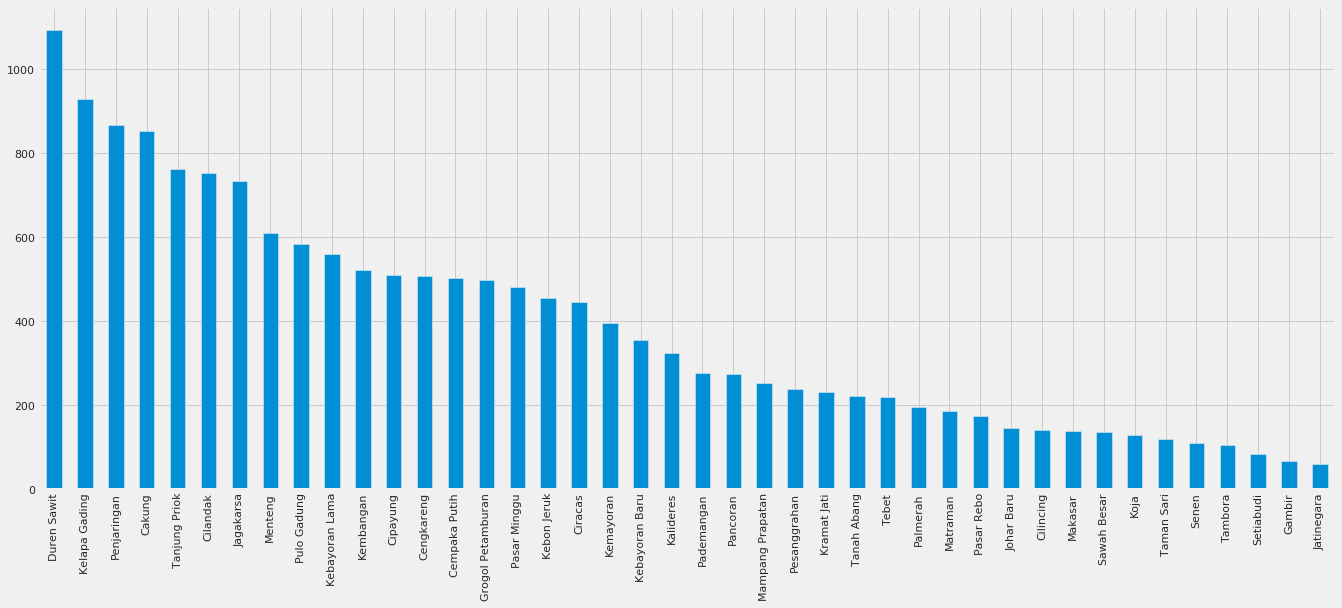

In [101]:
df['lokasi'].value_counts().plot.bar()

In [102]:
len(df[df['tipe_property'] == 'Rumah'])

13514

In [103]:
df['tipe_property'].value_counts()

Rumah        13514
lainnya       2023
Apartemen      718
Name: tipe_property, dtype: int64

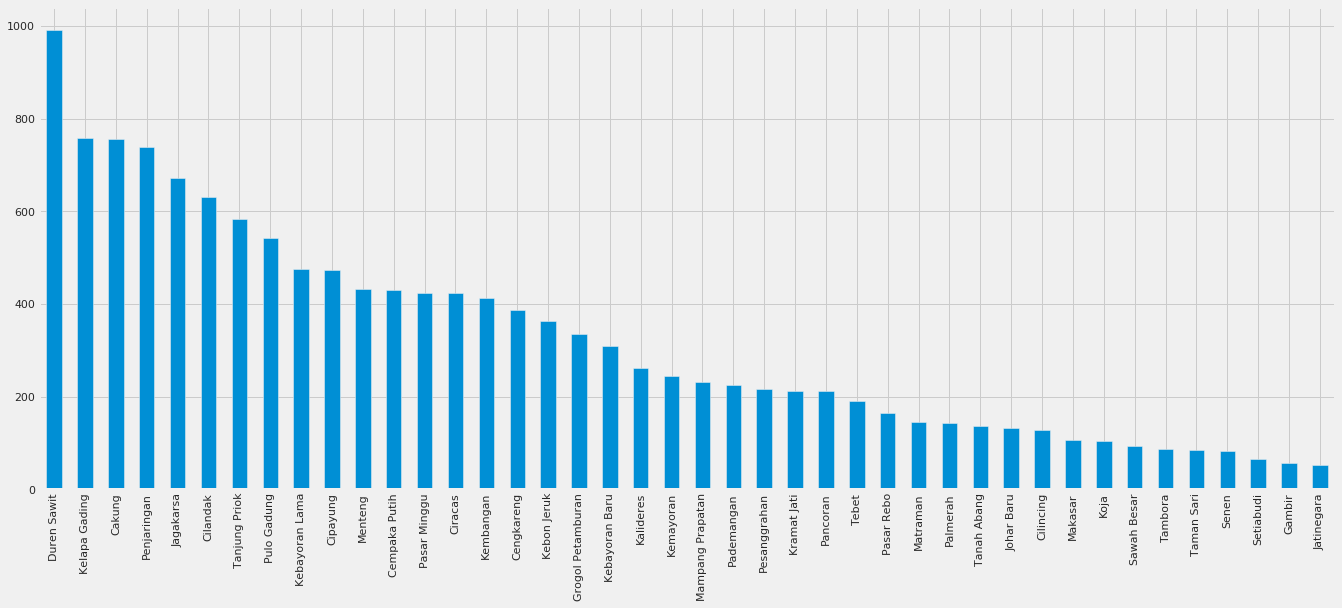

In [104]:
df[df['tipe_property']=='Rumah']['lokasi'].value_counts().plot.bar()

In [105]:
len(df[(df['tipe_property']=='Rumah') & (df['lokasi'] == 'Jatinegara')])

53

In [106]:
df = df[df['tipe_property']=='Rumah']

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13514 entries, 52 to 24659
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             13514 non-null  int64  
 1   kamar_mandi       13514 non-null  int64  
 2   kamar             13514 non-null  int64  
 3   lb                13514 non-null  float64
 4   lt                13514 non-null  float64
 5   tipe_property     13514 non-null  object 
 6   price             13514 non-null  float64
 7   sertifikat        13514 non-null  bool   
 8   deskripsi         13514 non-null  object 
 9   lokasi            13514 non-null  object 
 10  ada_garasi        13514 non-null  bool   
 11  pool              13514 non-null  bool   
 12  taman             13514 non-null  bool   
 13  electricity       13501 non-null  float64
 14  floors_total      13514 non-null  float64
 15  gym               13514 non-null  bool   
 16  floors_total_new  13514 non-null  int64

### Cleaning kolom `floors_total_new` again (with new function)

In [108]:
def cari_lantai(text):
    text = text.lower()
    jlh_lantai = 0
    lantai_found = True
    cari = re.search('lantai',text)
    try:
        S = cari.span()
        ttkdua = text[S[1]:S[1]+2]
        if ':' in ttkdua:
            hasil = text[S[1]:S[1]+4]
            H = re.search(r"\d",hasil)
            try:
                jlh_lantai = H.group()
            except:
                lantai_found = False
        else:
            if text[S[0]-1].isdigit() == True:
                if text[S[0]-2] == '/' and text[S[0]-3].isdigit() == True:
                    if text[S[0]-4].isdigit() == True:
                        jlh_lantai = text[S[0]-4]
                    elif text[S[0]-5].isdigit() == True:
                        jlh_lantai = text[S[0]-5]
                    else:
                        lantai_found = False
                elif text[S[0]-2] == ',' or text[S[0]-2] == '.':
                    if text[S[0]-3].isdigit() == True:
                        jlh_lantai = text[S[0]-3]
                    else:
                        jlh_lantai = text[S[0]-1]
                else:
                    jlh_lantai = text[S[0]-1]
            elif text[S[0]-2].isdigit() == True:
                if text[S[0]-3] == '/' and text[S[0]-4].isdigit() == True:
                    if text[S[0]-5].isdigit() == True:
                        jlh_lantai = text[S[0]-5]
                    elif text[S[0]-6].isdigit() == True:
                        jlh_lantai = text[S[0]-6]
                    else:
                        lantai_found = False
                elif text[S[0]-3] == ',' or text[S[0]-3] == '.':
                    if text[S[0]-4].isdigit() == True:
                        jlh_lantai = text[S[0]-4]
                    else:
                        jlh_lantai = text[S[0]-2]
                else:
                    jlh_lantai = text[S[0]-2]
            else:
                lantai_found = False
    except:
        lantai_found = False
    
    tingkat_found = True
    if lantai_found == False:
        # Mencari tingkat
        cari = re.search('tingkat',text)
        try:
            S = cari.span()
            ttkdua = text[S[1]:S[1]+2]
            if ':' in ttkdua:
                hasil = text[S[1]:S[1]+4]
                H = re.search(r"\d",hasil)
                try:
                    jlh_lantai = H.group()
                except:
                    tingkat_found = False
            else:
                if text[S[0]-1].isdigit() == True:
                    if text[S[0]-2] == '/' and text[S[0]-3].isdigit() == True:
                        if text[S[0]-4].isdigit() == True:
                            jlh_lantai = text[S[0]-4]
                        elif text[S[0]-5].isdigit() == True:
                            jlh_lantai = text[S[0]-5]
                        else:
                            tingkat_found = False
                    elif text[S[0]-2] == ',' or text[S[0]-2] == '.':
                        if text[S[0]-3].isdigit() == True:
                            jlh_lantai = text[S[0]-3]
                        else:
                            jlh_lantai = text[S[0]-1]
                    else:
                        jlh_lantai = text[S[0]-1]
                elif text[S[0]-2].isdigit() == True:
                    if text[S[0]-3] == '/' and text[S[0]-4].isdigit() == True:
                        if text[S[0]-5].isdigit() == True:
                            jlh_lantai = text[S[0]-5]
                        elif text[S[0]-6].isdigit() == True:
                            jlh_lantai = text[S[0]-6]
                        else:
                            tingkat_found = False
                    elif text[S[0]-3] == ',' or text[S[0]-3] == '.':
                        if text[S[0]-4].isdigit() == True:
                            jlh_lantai = text[S[0]-4]
                        else:
                            jlh_lantai = text[S[0]-2]
                    else:
                        jlh_lantai = text[S[0]-2]
                else:
                    tingkat_found = False
        except:
            tingkat_found = False
    
    if tingkat_found == False:
        # Mencari floors
        cari = re.search('floors',text)
        try:
            S = cari.span()
            ttkdua = text[S[1]:S[1]+2]
            if ':' in ttkdua:
                hasil = text[S[1]:S[1]+4]
                H = re.search(r"\d",hasil)
                try:
                    jlh_lantai = H.group()
                except:
                    floors_found = False
            else:
                if text[S[0]-1].isdigit() == True:
                    if text[S[0]-2] == '/' and text[S[0]-3].isdigit() == True:
                        if text[S[0]-4].isdigit() == True:
                            jlh_lantai = text[S[0]-4]
                        elif text[S[0]-5].isdigit() == True:
                            jlh_lantai = text[S[0]-5]
                        else:
                            floors_found = False
                    elif text[S[0]-2] == ',' or text[S[0]-2] == '.':
                        if text[S[0]-3].isdigit() == True:
                            jlh_lantai = text[S[0]-3]
                        else:
                            jlh_lantai = text[S[0]-1]
                    else:
                        jlh_lantai = text[S[0]-1]
                elif text[S[0]-2].isdigit() == True:
                    if text[S[0]-3] == '/' and text[S[0]-4].isdigit() == True:
                        if text[S[0]-5].isdigit() == True:
                            jlh_lantai = text[S[0]-5]
                        elif text[S[0]-6].isdigit() == True:
                            jlh_lantai = text[S[0]-6]
                        else:
                            floors_found = False
                    elif text[S[0]-3] == ',' or text[S[0]-3] == '.':
                        if text[S[0]-4].isdigit() == True:
                            jlh_lantai = text[S[0]-4]
                        else:
                            jlh_lantai = text[S[0]-2]
                    else:
                        jlh_lantai = text[S[0]-2]
                else:
                    floors_found = False
        except:
            floors_found = False

    return jlh_lantai

In [109]:
df['jumlah_lantai'] = 0
for i in range(len(df)):
    text = df['deskripsi'].iloc[i]
    y = cari_lantai(text)
    if y == 0:
        df['jumlah_lantai'].iloc[i] = df['floors_total_new'].iloc[i]
    else:
        df['jumlah_lantai'].iloc[i] = y


In [110]:
df['jumlah_lantai'].value_counts()

2    4950
2    3923
3    1253
1    1210
1     939
3     806
4     179
4     162
5      38
5      36
0       7
6       6
²       2
8       1
9       1
7       1
Name: jumlah_lantai, dtype: int64

In [111]:
df['floors_total_new'].value_counts()

2    9288
1    2244
3    1633
4     288
5      61
Name: floors_total_new, dtype: int64

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13514 entries, 52 to 24659
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             13514 non-null  int64  
 1   kamar_mandi       13514 non-null  int64  
 2   kamar             13514 non-null  int64  
 3   lb                13514 non-null  float64
 4   lt                13514 non-null  float64
 5   tipe_property     13514 non-null  object 
 6   price             13514 non-null  float64
 7   sertifikat        13514 non-null  bool   
 8   deskripsi         13514 non-null  object 
 9   lokasi            13514 non-null  object 
 10  ada_garasi        13514 non-null  bool   
 11  pool              13514 non-null  bool   
 12  taman             13514 non-null  bool   
 13  electricity       13501 non-null  float64
 14  floors_total      13514 non-null  float64
 15  gym               13514 non-null  bool   
 16  floors_total_new  13514 non-null  int64

In [113]:
for i in range(len(df)):
    try:
        df['jumlah_lantai'].iloc[i] = int(df['jumlah_lantai'].iloc[i])
    except:
        pass
df['jumlah_lantai'].value_counts()

2    8873
1    2149
3    2059
4     341
5      74
0       7
6       6
²       2
9       1
8       1
7       1
Name: jumlah_lantai, dtype: int64

In [114]:
a = [1,2,3,4,5]
for i in range(len(df)):
    if df['jumlah_lantai'].iloc[i] in a:
        pass
    else:
        df['jumlah_lantai'].iloc[i] = 0
df['jumlah_lantai'].value_counts()

2    8873
1    2149
3    2059
4     341
5      74
0      18
Name: jumlah_lantai, dtype: int64

In [115]:
df = df[df['jumlah_lantai'] != 0]

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13496 entries, 52 to 24659
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             13496 non-null  int64  
 1   kamar_mandi       13496 non-null  int64  
 2   kamar             13496 non-null  int64  
 3   lb                13496 non-null  float64
 4   lt                13496 non-null  float64
 5   tipe_property     13496 non-null  object 
 6   price             13496 non-null  float64
 7   sertifikat        13496 non-null  bool   
 8   deskripsi         13496 non-null  object 
 9   lokasi            13496 non-null  object 
 10  ada_garasi        13496 non-null  bool   
 11  pool              13496 non-null  bool   
 12  taman             13496 non-null  bool   
 13  electricity       13483 non-null  float64
 14  floors_total      13496 non-null  float64
 15  gym               13496 non-null  bool   
 16  floors_total_new  13496 non-null  int64

In [117]:
df['lokasi'].value_counts()

Duren Sawit          990
Kelapa Gading        757
Cakung               755
Penjaringan          737
Jagakarsa            673
Cilandak             631
Tanjung Priok        583
Pulo Gadung          539
Kebayoran Lama       475
Cipayung             473
Menteng              431
Cempaka Putih        428
Pasar Minggu         423
Ciracas              423
Kembangan            412
Cengkareng           386
Kebon Jeruk          364
Grogol Petamburan    335
Kebayoran Baru       309
Kalideres            261
Kemayoran            245
Mampang Prapatan     231
Pademangan           225
Pesanggrahan         217
Kramat Jati          212
Pancoran             212
Tebet                191
Pasar Rebo           164
Matraman             146
Palmerah             141
Tanah Abang          135
Johar Baru           132
Cilincing            127
Makasar              107
Koja                 104
Sawah Besar           94
Tambora               86
Taman Sari            84
Senen                 83
Setiabudi             66


In [119]:
df = df.drop(columns=['index', 'electricity_desc', 'electricity', 'sertifikat', 'tipe_property', 'floors_total', 
                     'floors_total_new'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13496 entries, 52 to 24659
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13496 non-null  int64  
 1   kamar          13496 non-null  int64  
 2   lb             13496 non-null  float64
 3   lt             13496 non-null  float64
 4   price          13496 non-null  float64
 5   deskripsi      13496 non-null  object 
 6   lokasi         13496 non-null  object 
 7   ada_garasi     13496 non-null  bool   
 8   pool           13496 non-null  bool   
 9   taman          13496 non-null  bool   
 10  gym            13496 non-null  bool   
 11  listrik        13496 non-null  float64
 12  jumlah_lantai  13496 non-null  object 
dtypes: bool(4), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [120]:
df.columns = ['kamar_mandi', 'kamar_tidur', 'luas_bangunan', 'luas_tanah', 'harga', 'deskripsi', 'kecamatan', 'garasi', 'kolam_renang', 
              'taman', 'gym', 'listrik', 'jumlah_lantai']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13496 entries, 52 to 24659
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13496 non-null  int64  
 1   kamar_tidur    13496 non-null  int64  
 2   luas_bangunan  13496 non-null  float64
 3   luas_tanah     13496 non-null  float64
 4   harga          13496 non-null  float64
 5   deskripsi      13496 non-null  object 
 6   kecamatan      13496 non-null  object 
 7   garasi         13496 non-null  bool   
 8   kolam_renang   13496 non-null  bool   
 9   taman          13496 non-null  bool   
 10  gym            13496 non-null  bool   
 11  listrik        13496 non-null  float64
 12  jumlah_lantai  13496 non-null  object 
dtypes: bool(4), float64(4), int64(2), object(3)
memory usage: 1.1+ MB


In [121]:
df['jumlah_lantai'].value_counts()

2    8873
1    2149
3    2059
4     341
5      74
Name: jumlah_lantai, dtype: int64

In [122]:
df['jumlah_lantai'] = df['jumlah_lantai'].astype('int')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13496 entries, 52 to 24659
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13496 non-null  int64  
 1   kamar_tidur    13496 non-null  int64  
 2   luas_bangunan  13496 non-null  float64
 3   luas_tanah     13496 non-null  float64
 4   harga          13496 non-null  float64
 5   deskripsi      13496 non-null  object 
 6   kecamatan      13496 non-null  object 
 7   garasi         13496 non-null  bool   
 8   kolam_renang   13496 non-null  bool   
 9   taman          13496 non-null  bool   
 10  gym            13496 non-null  bool   
 11  listrik        13496 non-null  float64
 12  jumlah_lantai  13496 non-null  int64  
dtypes: bool(4), float64(4), int64(3), object(2)
memory usage: 1.1+ MB


In [124]:
df.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,deskripsi,kecamatan,garasi,kolam_renang,taman,gym,listrik,jumlah_lantai
52,5,6,353.0,155.0,6.700000e+09,telah hadir... townhouse terbaru dan termurah ...,Mampang Prapatan,True,True,False,False,6600.0,2
75,4,4,90.0,60.0,1.299000e+09,"rumah murah dekat stasiun mrt lebak bulus, mod...",Cilandak,True,False,False,False,2200.0,2
93,4,6,160.0,109.0,2.300000e+09,"rumah 2 lantai bebas banjir, dekat pusat perbe...",Kebayoran Baru,True,False,False,False,3500.0,2
131,3,4,125.0,72.0,3.149480e+09,di pasarkan satu-satunya townhouse termurah di...,Mampang Prapatan,True,False,True,False,2200.0,2
146,3,4,90.0,87.0,1.210000e+09,marwah regency jagakarsa jakarta selatan lokas...,Jagakarsa,True,True,False,False,2200.0,1


In [125]:
df = df.reset_index(drop=True)
df.head()

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,deskripsi,kecamatan,garasi,kolam_renang,taman,gym,listrik,jumlah_lantai
0,5,6,353.0,155.0,6.700000e+09,telah hadir... townhouse terbaru dan termurah ...,Mampang Prapatan,True,True,False,False,6600.0,2
1,4,4,90.0,60.0,1.299000e+09,"rumah murah dekat stasiun mrt lebak bulus, mod...",Cilandak,True,False,False,False,2200.0,2
2,4,6,160.0,109.0,2.300000e+09,"rumah 2 lantai bebas banjir, dekat pusat perbe...",Kebayoran Baru,True,False,False,False,3500.0,2
3,3,4,125.0,72.0,3.149480e+09,di pasarkan satu-satunya townhouse termurah di...,Mampang Prapatan,True,False,True,False,2200.0,2
4,3,4,90.0,87.0,1.210000e+09,marwah regency jagakarsa jakarta selatan lokas...,Jagakarsa,True,True,False,False,2200.0,1


In [126]:
df

,kamar_mandi,kamar_tidur,luas_bangunan,luas_tanah,harga,deskripsi,kecamatan,garasi,kolam_renang,taman,gym,listrik,jumlah_lantai
0,5,6,353.0,155.0,6.700000e+09,telah hadir... townhouse terbaru dan termurah ...,Mampang Prapatan,True,True,False,False,6600.0,2
1,4,4,90.0,60.0,1.299000e+09,"rumah murah dekat stasiun mrt lebak bulus, mod...",Cilandak,True,False,False,False,2200.0,2
2,4,6,160.0,109.0,2.300000e+09,"rumah 2 lantai bebas banjir, dekat pusat perbe...",Kebayoran Baru,True,False,False,False,3500.0,2
3,3,4,125.0,72.0,3.149480e+09,di pasarkan satu-satunya townhouse termurah di...,Mampang Prapatan,True,False,True,False,2200.0,2
4,3,4,90.0,87.0,1.210000e+09,marwah regency jagakarsa jakarta selatan lokas...,Jagakarsa,True,True,False,False,2200.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13491,5,5,350.0,250.0,3.800000e+09,jenis property : rumah\njual/sewa : jual\nharg...,Koja,True,False,False,False,2200.0,2
13492,5,5,250.0,320.0,8.800000e+09,"rumah dijual jakarta utara rumah lux, terawat ...",Koja,True,False,False,False,2200.0,1
13493,6,6,250.0,173.0,2.950000e+09,rumah dijual jakarta utara,Koja,True,False,False,False,2200.0,1
13494,5,5,97.0,75.0,1.750000e+09,launching perdana! rumah murah cluster georgia...,Koja,True,False,False,False,2200.0,1


In [129]:
def kostan(text):
    text = text.lower()
    if 'kos' in text or 'kost' in text:
        return 'Kost'
    else:
        return 'Rumah'

df['tipe'] = 0
df['tipe'] = df['deskripsi'].apply(lambda x : kostan(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13496 entries, 0 to 13495
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    13496 non-null  int64  
 1   kamar_tidur    13496 non-null  int64  
 2   luas_bangunan  13496 non-null  float64
 3   luas_tanah     13496 non-null  float64
 4   harga          13496 non-null  float64
 5   deskripsi      13496 non-null  object 
 6   kecamatan      13496 non-null  object 
 7   garasi         13496 non-null  bool   
 8   kolam_renang   13496 non-null  bool   
 9   taman          13496 non-null  bool   
 10  gym            13496 non-null  bool   
 11  listrik        13496 non-null  float64
 12  jumlah_lantai  13496 non-null  int64  
 13  tipe           13496 non-null  object 
dtypes: bool(4), float64(4), int64(3), object(3)
memory usage: 1.1+ MB


In [132]:
df.to_csv('data_clean.csv')